In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import defaultdict
from dataclasses import dataclass
from typing import Dict, Set, Tuple, List

c:\Program Files\Python310\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


# Define functions

## Keywords specification

In [2]:
# Categorized Hashtags

locals = [
    "kuching",
    "penangisland",
    "penangfood",
    "gurneyplaza",
    "mujisunwaypyramid",
    "wankatravel",
    "PakCicak",
    'haziqnadzli',
    'grillhaven',
    'daiyantrisha',
    'thespring_kch',
    'gurneyplazapenang',
    'curiocoffeeroaster',
    'sunway_pyramid',
    'jasdesigner'

]

international = [
    "UniqloUT",
    "UniqloU",
    "Uniqlo U",
    "Uniqlo Ul",
    "UniqloC",
    "AnyaHindmarch",
    "uniqloxanyahindmarch",
    "marimekko",
    "UniqloxMarimekko",
    "MoMA",
    "TheLouvreXCamilleHenrotUT",
    "KAWSWarholUT",
    "CactusPlantFleaMarket",
    "COMPTOIRDESCOTONNIERS",
    "PRINCESSEtamtam",
    "CPFM",
    "NYPopArtUT",
    "MomaIconsUT",
    "MagnumPhotosUT",
    "SanrioUT",
    "SpongeBob",
    "SpongeBob25",
    "PeanutsUT",
    "MickeyUT",
    "LisaLarsonUT",
    "HenriMatisseUT",
    "Godzilla70thAnniversaryUT",
    "DemonSlayerUT",
    "JujutsuKaisenUT",
    "ArcaneUT",
    "DragonBallDAIMA",
    "UniversalMovieUT",
    '::)',
    'jwanderson',
    'spongebobsquarepants',
    'SpongeBob',
    'miffy',
    'clarewaightkeller',
    'Meilin', 
    'DragonBallDaima', 
    'jw_anderson',
    'jwanderson',
    'CactusPlantFleaMarket',
    'KAWS',
    'Anya',
    'Hindmarch',
    'marimekko',
    'mofusandUT',
    'UTArchive',
    'Yu',
    '🐉',
    'Demon Slayer',
    'Jujutsu Kaisen',
    'Walter',
    'Chandoha',
    'Elmo',
    'PicassoUT',
    'WithUT',
    'MAGICFORALLFOREVERUT',
    'miffyLoungeUT',
    'UTme'
]

seasonal = [
    "season",
    "raya",
    "thespring",
    "winter",
    "winterfashion",
    "ChillyWeather",
    "SpringArising",
    "LayersofSpring",
    "christmas",
    "ValentinesDay",
    "Deepavali",
    "ChineseNewYear",
    "yearendholiday",
    "ForTheLoveOfCold",
    'Valentine',
    'Chinese',
    'CNY',
    'Xmas',
    'Holidays',
    '40thAnniversary',
    'holiday',
    'D11ShoppingFestival',
    'GiftedWithJoy',
    'spring',
    'valentines',
    '2025'
]


store_opening = [
    'located',
    'ft',
    'square',
    'feet',
    'open',
    'StoreOpening',
    'opening',
    'houseware'
]

promotions = [
    'voucher',
    'specials',
    'winners',
    'saleee',
    'limited',
    'gift',
    'D11ShoppingFestival',
    'free',
    'winner',
    'vouchers',
    'win'
]


core_products = [
    "ootd",
    "airism",
    "AIRismTshirt",
    "DRYEX",
    "HEATTECH",
    "PUFFTECH",
    "UniqloJeans",
    "UniqloDenim",
    "UniqloBraTop",
    "UniqloKids",
    "Tshirts",
    "LinenCollection",
    "PremiumLinen",
    "PremiumLinenShirt",
    "Cardigan",
    "Overshirt",
    "GearedShorts",
    "FormalPants",
    "PoloShirts",
    "PulloverHoodie",
    "Sweater",
    "KnitCollection",
    "Innerwear",
    "BraTops",
    "WirelessBra",
    'skorts',
    'UNIQLODenim',
    'jackets',
    'shorts',
    'Bratop',
    'Bra',
    'top',
    'EZY',
    'jeans',
    'workwear',
    'sizes',
    'clothing',
    'fabric',
    'fits',
    'Tshirt',
    'Shorts',
    'fitness',
    'windproof',
    'parka',
    'blouson',
    'stretch',
    'UV',
    'wearing',
    'sweats',
    'utility',
    'sports',
    'bag',
    "ReversibleParka",
    "shirt",
    "UNIQLOBraTop",
    'knitwear',
    'knit',
    'polo',
    'GearedShorts',
    'HalfZip',
    'vibe',
    'overshirt',
    'shades',
    'tee',
    'fashiontok',
    'hoodie',
    'item',
    'PoloSweater',
    'sweatpants',
    'denim',
    'staples',
    'Sweatshirt',
    'items',
    'NewArrivals',
    'bottoms',
    'blouse',
    'linen',
    'clothes',
    'tees',
    'flannel',
    'wardrobe😄',
    'SweatsCollection',
    'natural',
    'Masterpiece',
    'modest',
    'pajamas'
]



core_products_muji = [
    'essentials',
    'essential',
    'convenient',
    'convenience',
    'pouch',
    'gadget',
    'case',
    'cushion',
    'furniture',
    'outdoor',
    'rice',
    'laundry',
    'cases',
    'stainless',
    'cleaning',
    'tools',
    'school',
    'bags',
    'dining',
    'dustbins',
    'sofa',
    'case',
    'sink',
    'candle',
    'pillow',
    'rita',
    'journal',
    'planner',
    'containers',
    'fit',
    'outfit',
    'linen',
    'styling',
    'pants',
    'wardrobe',
    'lace',
    'labo',
    'kapok',
    'lyocell',
    'hats',
    'flannel',
    'fleece',
    'baju',
    'cardigan'
]


others = [
    'passport',
    'hiring',
    'ranking',
    'suspicious',
    'crab',
    'food',
    'gelato']

others_uniqlo = ['conservation',
 'green',
 'environment',
 'sustainable']


In [3]:
def expand_campaign_influencer_combinations(df):
    """
    Expand the dataframe to show unique combinations of campaigns and influencers
    
    Parameters:
    df: DataFrame with 'Campaigns' list column and 'influencers' set column
    
    Returns:
    DataFrame with individual campaign-influencer combinations
    """
    # Initialize an empty list to store expanded rows
    expanded_rows = []
    
    # Create sentiment score mapping
    sentiment_map = {
        'Very Negative': 1,
        'Negative': 2,
        'Neutral': 3,
        'Positive': 4,
        'Very Positive': 5
    }
    
    # Process each row in the original dataframe
    for _, row in df.iterrows():
        # Get list of campaigns and influencers
        campaigns = row['Campaigns']
        influencers = row['influencers']
        
        # Add sentiment score based on text sentiment
        sentiment_score = sentiment_map.get(row['sentiment'], 3)  # Default to neutral if not found
        
        # Skip if no influencers
        if len(influencers) == 0:
            # Add each campaign with empty influencer
            for campaign in campaigns:
                new_row = row.copy()
                new_row['Campaign'] = campaign
                new_row['Influencer'] = None
                new_row['sentiment_score'] = float(sentiment_score)
                expanded_rows.append(new_row)
        else:
            # Create combinations of campaigns and influencers
            for campaign in campaigns:
                for influencer in influencers:
                    new_row = row.copy()
                    new_row['Campaign'] = campaign
                    new_row['Influencer'] = influencer
                    new_row['sentiment_score'] = float(sentiment_score)
                    expanded_rows.append(new_row)
    
    # Create new dataframe from expanded rows
    expanded_df = pd.DataFrame(expanded_rows)
    
    # Add engagement metrics
    campaign_influencer_stats = expanded_df.groupby(['Brand', 'Campaign', 'Influencer', 'Platform']).agg({
        'engagements': ['sum', 'mean', 'count'], 
        'sentiment': lambda x: x.value_counts().to_dict(),
        'sentiment_score': ['mean']
    }).reset_index()
    
    # Flatten the multi-index columns
    campaign_influencer_stats.columns = [
        '_'.join(col).strip('_') for col in campaign_influencer_stats.columns.values
    ]
    
    # Rename columns for clarity
    campaign_influencer_stats = campaign_influencer_stats.rename(columns={
        'engagements_sum': 'total_engagements',
        'engagements_mean': 'avg_engagement_per_post',
        'engagements_count': 'post_count',
        'sentiment_<lambda>': 'sentiment_distribution',
        'sentiment_score_mean': 'avg_sentiment_score'
    })
    
    # Sort by total engagements
    return campaign_influencer_stats.sort_values(['Brand', 'total_engagements'], ascending=[True, False])

## Functions

In [4]:

influencer_names = locals + international

def cleans_text(text):
    # Implement your cleaning logic here (e.g., convert to lowercase)
    return text.lower()

def extract_influencers_per_post(row):
    """
    Extract influencers for a single post based on coauthors_username, ownerUsername, and mentions in post_caption.
    
    Parameters:
    row: A pandas Series or dictionary with post information
    
    Returns:
    set: A set of unique influencer names with standardized naming
    """
    influencers = set()
    brand_accounts = ['mujimy', 'uniqlomyofficial', 'mujimalaysia', 
                     'uniqlo_malaysia', '@uniqlo_malaysia', '@mujimalaysia',
                     'UNIQLO', 'uniqlo', 'muji', '@Brand']
    
    # Get the post caption and hashtags
    caption = row.get('post_caption', "") if isinstance(row, dict) else row.get('post_caption', "")
    hashtags = row.get('hashtags', []) if isinstance(row, dict) else row.get('hashtags', [])
    
    # Clean caption and hashtags
    cleaned_caption = cleans_text(caption)
    cleaned_hashtags = [cleans_text(tag).strip("#") for tag in hashtags]
    
    # Extract coauthors
    coauthors = row.get('coauthors_username', []) if isinstance(row, dict) else row.get('coauthors_username', [])
    if isinstance(coauthors, list) and len(coauthors) > 0:
        for coauthor in coauthors:
            if coauthor and coauthor.lower() not in brand_accounts:
                influencers.add(coauthor)
    
    # Check owner username
    owner = row.get('ownerUsername', "") if isinstance(row, dict) else row.get('ownerUsername', "")
    if owner and isinstance(owner, str) and owner.lower() not in brand_accounts:
        # Remove @ if present at the beginning
        clean_owner = owner[1:] if owner.startswith('@') else owner
        influencers.add(clean_owner)
    
    # Extract mentions from caption
    if caption and isinstance(caption, str):
        # Find @mentions with improved regex that can handle punctuation and whitespace
        mentions = re.findall(r'@([a-zA-Z0-9_.]+)', caption)
        for mention in mentions:
            mention_lower = mention.lower()
            if mention_lower not in brand_accounts:
                influencers.add(mention)
        
        # Check for influencer names in caption and hashtags
        combined_text = cleaned_caption + ' '.join(cleaned_hashtags)
        for name in influencer_names:
            if name.lower() in combined_text:
                influencers.add(name)

    
# Filtering    
    if influencers in [{'Yu'}, {'uniqlomyofficial.'}, {'muji.com.my'}, {'uniqlo.com.my'}, {'Uniqlo U', 'Uniqlo Ul'}]:
        influencers = set()

    if influencers in [{'CactusPlantFleaMarket', 'SpongeBob', 'SpongeBob25', 'CPFM'}, {'CactusPlantFleaMarket', 'SpongeBob', 'SpongeBob25'}]:
        influencers = {'CactusPlantFleaMarket', 'SpongeBob'}
    
    if influencers in [{'Hindmarch', 'Anya', 'AnyaHindmarch'}, {'UniqloU', 'uniqloxanyahindmarch', 'AnyaHindmarch', 'anyahindmarch', 'Hindmarch', 'Anya'}, {'uniqloxanyahindmarch', 'Hindmarch', 'AnyaHindmarch', 'anyahindmarch', 'Anya'}]:
        influencers = {'anyahindmarch'}
    
    if influencers in [{'UniqloU', 'UniqloxMarimekko', 'marimekko'}, {'UniqloxMarimekko', 'marimekko'}]:
        influencers = {'marimekko'}
    
        
    if influencers in [{'🐉'}, {'🐉', 'DragonBallDAIMA', 'DragonBallDaima'}, {'DragonBallDAIMA', 'DragonBallDaima'}]:
        influencers = {'DragonBallDaima'}
    
    if influencers in [{'KAWS', 'UniqloU', 'UniqloUT', 'WithUT'}]:
        influencers = {'UniqloUT', 'KAWS', 'KAWSWarholUT', 'One Piece', 'Star Wars'}
        
    if influencers in [{'UniqloU', 'UniqloUT', 'zuvia_p', 'Jujutsu Kaisen', 'Demon Slayer', 'UTArchive'}]:
        influencers = {'UniqloUT', 'Jujutsu Kaisen', 'Demon Slayer', 'zuvia_p'}
    
    if influencers in [{'JujutsuKaisenUT', 'DemonSlayerUT', 'UniqloU', 'UniqloUT', 'Jujutsu Kaisen', 'WithUT', 'Demon Slayer', 'UTArchive'}]:
        influencers = {'UniqloUT', 'Jujutsu Kaisen', 'Demon Slayer'}
        
    if influencers in [{'UniqloU', 'UniqloUT', 'Yu', 'Godzilla70thAnniversaryUT'}]:
        influencers = {'UniqloUT', 'Godzilla70thAnniversaryUT'}
    
    if influencers in [{'WithUT', 'UniqloU', 'UniqloUT'}, {'UTme'}, {'uniqlo.com.my', 'UTme'}]:
        influencers = {'UniqloUT'}
    
    if influencers in [{'PeanutsUT', 'UniqloU', 'UniqloUT', 'WithUT'}]:
        influencers = {'UniqloUT', 'PeanutsUT'}
    
    if influencers in [{'LisaLarsonUT', 'UniqloU', 'UniqloUT', 'WithUT'}]:
        influencers = {'UniqloUT', 'LisaLarsonUT'}
    
    if influencers in [{'KAWS', 'UniqloU', 'UniqloUT', 'WithUT', 'KAWSWarholUT'}]:
        influencers = {'UniqloUT', 'KAWS', 'KAWSWarholUT'}
    
    if influencers in [{'WithUT', 'UniqloU', 'UniqloUT', 'NYPopArtUT'}]:
        influencers = {'UniqloUT', 'NYPopArtUT'}
    
    if influencers in [{'WithUT', 'UniqloU', 'UniqloUT', 'MAGICFORALLFOREVERUT'}, {'MickeyUT', 'UniqloU', 'UniqloUT', 'WithUT', 'Yu'}]:
        influencers = {'UniqloUT', 'Disney'}

    if influencers in [{'WithUT', 'UniqloU', 'UniqloUT', 'SanrioUT'}]:
        influencers = {'UniqloUT', 'SanrioUT'}
    
    if influencers in [{'HenriMatisseUT', 'UniqloU', 'UniqloUT'}]:
        influencers = {'UniqloUT', 'HenriMatisseUT'}
    
    if influencers in [{'WithUT', 'UniqloU', 'UniqloUT', 'MagnumPhotosUT'}]:
        influencers = {'UniqloUT', 'MagnumPhotosUT'}
        
    if influencers in [{'WithUT', 'MoMA', 'auninadzirah'}]:
        influencers = {'UniqloUT', 'MoMA', 'auninadzirah'}
    
    if influencers in [{'Chandoha', 'UniqloU', 'UniqloUT', 'WithUT', 'Walter'}]:
        influencers = {'UniqloUT', 'Walter Chandoha'}
        
    if influencers in [{'UniversalMovieUT', 'UniqloU', 'UniqloUT', 'WithUT'}]:
        influencers = {'UniqloUT', 'UniversalMovieUT'}
    
    if influencers in [{'MomaIconsUT', 'UniqloU', 'UniqloUT', 'WithUT', 'MoMA'}]:
        influencers = {'UniqloUT', 'UniversalMovieUT'}
    
    if influencers in [{'MomaIconsUT', 'UniqloU', 'UniqloUT', 'WithUT', 'MoMA'}]:
        influencers = {'UniqloUT', 'MoMA'} 
    
    if influencers in [{'WithUT', 'UniqloU', 'UniqloUT', 'ArcaneUT'}]:
        influencers = {'UniqloUT', 'ArcaneUT'}
    
    if influencers in [{'UniqloU', 'UniqloUT', 'PicassoUT'}]:
        influencers = {'UniqloUT', 'PicassoUT'}
        
    if influencers in [{'UniqloU', 'UniqloUT', 'miffyLoungeUT', 'WithUT', 'miffy'}]:
        influencers = {'UniqloUT', 'miffyLoungeUT'}
    
    if influencers in [{'Yu', 'beeboowy'}]:
        influencers = {'beeboowy'}
    
    if influencers in [{'Uniqlo U'}]:
        influencers = {'UniqloU'}

    if influencers in [{'PakCicak', 'christhechindian', 'Yu'}]:
        influencers = {'christhechindian','PakCicak'}
    
    if influencers in [{'mifoodmalaysia', 'mujisunwaypyramid'}]:
        influencers = {'mifoodmalaysia', 'sunway_pyramid'}
    
    if influencers in [{'bellazahirzain.', 'itsbrandonho'}]:
        influencers = {'bellazahirzain', 'itsbrandonho'}
        
    if influencers in [{'Meilin', 'UTme'}]:
        influencers = {'UniqloUT', 'Han Meilin'}
        
    if influencers in [{'khye_the_guy'}]:
        influencers = {'khyetheguy'}
    
    if influencers in [{'jw_anderson', 'jwanderson', 'jonathan.anderson'}, {'jwanderson'}]:
        influencers = {'jw_anderson'}
    
    if influencers in [{'beanbrothers.my', 'Yu'}, {'Yu', 'bean.brothers.my'}]:
        influencers = {'beanbrothers.my'}
    
    if influencers in [{'PakCicak', 'Yu'}]:
        influencers = {'PakCicak'}
    
    if influencers in [{'Malaypantv'}]:
        influencers = {'malaypantv_official'}
    
    if influencers in [{'CPFM', 'SpongeBob', 'SpongeBob25', 'kidinn___', 'CactusPlantFleaMarket'}]:
        influencers = {'SpongeBob', 'kidinn___', 'CactusPlantFleaMarket'}
    
    if influencers in [{'CPFM', 'krystonyang', 'SpongeBob', 'n1ck_n9', 'SpongeBob25', 'CactusPlantFleaMarket', 'daengsyarif_'}]:
        influencers = {'krystonyang', 'SpongeBob', 'n1ck_n9', 'CactusPlantFleaMarket', 'daengsyarif_'}
    
    if influencers in [{'CPFM', 'SpongeBob', 'anthony.mayii', 'SpongeBob25', 'CactusPlantFleaMarket', 'debbielow'}]:
        influencers = {'SpongeBob', 'anthony.mayii', 'CactusPlantFleaMarket', 'debbielow'}
    
    if influencers == set():
        influencers.add('Brand')
        
    return influencers

In [5]:
def clean_text(text):
    """Remove punctuation attached to words, convert @mentions to plain text, and convert to lowercase."""
    text = re.sub(r'@', '', text)  # Remove @mentions
    text = re.sub(r"(\w)'s\b", r"\1 s", text)  # Split possessive forms
    text = re.sub(r"(\w)[^\w\s']", r"\1", text)  # Remove punctuation after a word
    text = re.sub(r"[^\w\s'](\w)", r"\1", text)  # Remove punctuation before a word
    return text.lower()

def get_campaign_tags(brand, post_caption, hashtags, co_author_count):
    """
    Identify brand-specific campaigns based on content and co-authors.
    
    Parameters:
    - brand: The brand name to use for keyword mapping
    - post_caption: String containing post caption
    - hashtags: List of hashtags used
    - co_author_count: Number of co-authors
    
    Returns:
    - Sorted list of unique campaign names
    """
    # Define brand-specific campaign mappings
    BRAND_CAMPAIGNS = {
        "uniqlo": {
            "Core Products": core_products,
            "Others": others_uniqlo,
            "Locals": locals,
            "International": international,
            "Seasonal": seasonal,
            "Store Opening": store_opening,
            "Promotions": promotions
        },
        "muji": {
            "Core Products": core_products_muji,
            "Others": others,
            "Promotions": promotions,
            "Locals": locals,
            "International": international,
            "Seasonal": seasonal,
            "Store Opening": store_opening
        }
    }

    # Determine the brand based on the dataset
    brands = "uniqlo" if "uniqlo" in brand.lower() else "muji"

    # Get campaigns for specified brand
    campaign_map = BRAND_CAMPAIGNS.get(brands, {})
    
    # Process text content
    caption_words = clean_text(post_caption).split()
    cleaned_hashtags = [clean_text(tag).strip("#") for tag in hashtags]
    combined_text = caption_words + cleaned_hashtags
    
    # Convert to set for exact matching
    text_words = set(combined_text)

    
    # Find matching campaigns
    matched = set()
    for campaign, keywords in campaign_map.items():
        # Normalize keywords and check for EXACT matches
        normalized_keywords = [kw.strip().lower() for kw in keywords]
        for kw in normalized_keywords:
            if kw in text_words:
                matched.add(campaign)
                break  # Stop checking other keywords once a match is found

    # Add local campaign conditionally
    if co_author_count > 0:
        matched.add("Locals")

    return sorted(matched)

In [6]:
@dataclass
class NetworkStyle:
    """Cấu hình style cho network visualization"""
    BRAND_STYLE = {
        'alpha': 0.9,
        'default_color': 'orange',
        'uniqlo_color': 'red',
        'size': 2500  # Fixed size for brand nodes
    }
    
    INFLUENCER_STYLE = {
        'color': 'skyblue',
        'alpha': 0.7
    }
    
    EDGE_STYLE = {
        'brand': {
            'width': 1.5,
            'style': 'dashed',
            'alpha': 0.5
        },
        'collab': {
            'base_width': 0.2,
            'color': 'green',
            'alpha': 0.8
        }
    }

class NetworkAnalyzer:
    def __init__(self, df: pd.DataFrame):
        self.df = df
        self.style = NetworkStyle()
        self.influencer_engagement = self._calculate_influencer_engagement()
        self.influencer_brand_map = self._create_influencer_brand_map()
        self.brand_engagement = self._calculate_brand_engagement()
        self.relationship_df = self._create_relationship_df()

    def _calculate_influencer_engagement(self) -> Dict[str, float]:
        """Tính tổng engagement cho mỗi influencer"""
        engagement = defaultdict(float)
        for _, row in self.df.iterrows():
            if isinstance(row['influencers'], set):
                for influencer in row['influencers']:
                    engagement[influencer] += row['engagements']
        return dict(engagement)

    def _create_influencer_brand_map(self) -> Dict[str, List[str]]:
        """Tạo mapping giữa influencer và brand"""
        brand_map = defaultdict(set)
        for _, row in self.df.iterrows():
            if isinstance(row['influencers'], set):
                for influencer in row['influencers']:
                    brand_map[influencer].add(row['Brand'])
        return {k: list(v) for k, v in brand_map.items()}

    def _calculate_brand_engagement(self) -> Dict[str, float]:
        """Tính tổng engagement cho mỗi brand"""
        brand_engagement = defaultdict(float)
        for brand in self.df['Brand'].unique():
            brand_engagement[brand] = sum(
                engagement for influencer, engagement in self.influencer_engagement.items()
                if brand in self.influencer_brand_map.get(influencer, [])
            )
        return dict(brand_engagement)

    def _create_relationship_df(self) -> pd.DataFrame:
        """Tạo DataFrame chứa mối quan hệ giữa các influencer"""
        connections = defaultdict(int)
        for _, row in self.df.iterrows():
            influencers = row['influencers']
            if isinstance(influencers, set) and len(influencers) > 1:
                for i, inf1 in enumerate(influencers):
                    for inf2 in list(influencers)[i + 1:]:
                        connections[tuple(sorted([inf1, inf2]))] += 1

        return pd.DataFrame([
            {'Influencer1': inf1, 'Influencer2': inf2, 'Connection_Strength': weight}
            for (inf1, inf2), weight in connections.items()
        ]).sort_values('Connection_Strength', ascending=False)

    def create_brand_network(self, brand_name: str) -> nx.Graph:
        """Tạo và hiển thị network cho một brand cụ thể"""
        G = nx.Graph()
        brand_color = self.style.BRAND_STYLE['uniqlo_color'] if brand_name == 'UNIQLO' else self.style.BRAND_STYLE['default_color']
        
        # Thêm nodes và edges
        G.add_node(brand_name, type='brand', color=brand_color)
        brand_influencers = {inf for inf, brands in self.influencer_brand_map.items() if brand_name in brands}
        
        self._add_network_elements(G, brand_name, brand_influencers, brand_color)
        self._visualize_network(G, brand_name, brand_color)
        
        return G

    def _add_network_elements(self, G: nx.Graph, brand_name: str, brand_influencers: Set[str], brand_color: str):
        """Thêm các elements vào network"""
        # Thêm influencer nodes
        for influencer in brand_influencers:
            G.add_node(influencer, type='influencer')
            G.add_edge(brand_name, influencer, type='brand-connection')

        # Thêm collaboration edges
        collab_edges = self.relationship_df[
            self.relationship_df['Influencer1'].isin(brand_influencers) &
            self.relationship_df['Influencer2'].isin(brand_influencers)
        ]
        
        for _, row in collab_edges.iterrows():
            G.add_edge(row['Influencer1'], row['Influencer2'],
                      weight=row['Connection_Strength'], type='collaboration')

    def _visualize_network(self, G: nx.Graph, brand_name: str, brand_color: str):
        """Hiển thị network với styling"""
        plt.figure(figsize=(13, 14))
        pos = nx.spring_layout(G, k=19, iterations=2000, seed=42)
        
        # Vẽ nodes và edges
        self._draw_network_elements(G, pos, brand_name, brand_color)
        
        # Thêm labels và legend
        self._add_visualization_details(G, pos, brand_name, brand_color)
        
        plt.title(f"{brand_name} Collaborator Network Analysis", fontsize=20)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    def _draw_network_elements(self, G: nx.Graph, pos: Dict,brand_name: str , brand_color: str):
        """Vẽ các elements của network"""
        node_sizes = self._calculate_node_sizes(G)
        
        # Vẽ nodes
        for node_type in ['brand', 'influencer']:
            nodes = [n for n, d in G.nodes(data=True) if d.get('type') == node_type]
            color = brand_color if node_type == 'brand' else self.style.INFLUENCER_STYLE['color']
            alpha = self.style.BRAND_STYLE['alpha'] if node_type == 'brand' else self.style.INFLUENCER_STYLE['alpha']
            
            nx.draw_networkx_nodes(G, pos, nodelist=nodes,
                                 node_color=color,
                                 node_size=[node_sizes[i] for i, node in enumerate(G.nodes()) if node in nodes],
                                 alpha=alpha)

        # Vẽ edges
        self._draw_edges(G, pos, brand_color)

    def _calculate_node_sizes(self, G: nx.Graph) -> List[float]:
        """Tính kích thước cho các nodes"""
        return [
            # Fixed size for brand nodes, calculated size for influencer nodes
            self.style.BRAND_STYLE['size'] if G.nodes[node].get('type') == 'brand' 
            else self.influencer_engagement.get(node, 10)  * 0.1 ## Adjust size scaling factor
            for node in G.nodes()
        ]

    def _draw_edges(self, G: nx.Graph, pos: Dict, brand_color: str):
        """Vẽ các loại edges khác nhau"""
        edge_types = {
            'brand-connection': {'color': brand_color, **self.style.EDGE_STYLE['brand']},
            'collaboration': self.style.EDGE_STYLE['collab']
        }
        
        for edge_type, style in edge_types.items():
            edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == edge_type]
            if edges:
                widths = [G[u][v].get('weight', 1) * style['base_width'] if edge_type == 'collaboration' else style['width']
                         for u, v in edges]
                nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=style['color'],
                                     width=widths, alpha=style['alpha'],
                                     style=style.get('style', 'solid'))

    def _add_visualization_details(self, G: nx.Graph, pos: Dict, brand_name: str, brand_color: str):
        """Thêm labels và legend"""
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_family='sans-serif')
        
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', label=brand_name,
                      markersize=15, markerfacecolor=brand_color),
            plt.Line2D([0], [0], marker='o', color='w', label='Influencers',
                      markersize=10, markerfacecolor=self.style.INFLUENCER_STYLE['color']),
            plt.Line2D([0], [0], color=brand_color, linestyle='dashed',
                      label='Brand-Collaborator Connection'),
            plt.Line2D([0], [0], color=self.style.EDGE_STYLE['collab']['color'],
                      label=' Collaboration')
        ]
        
        plt.legend(handles=legend_elements, loc='lower right', fontsize=12)

# Sử dụng
def analyze_relationships(df: pd.DataFrame):
    """Phân tích và hiển thị network cho mỗi brand"""
    analyzer = NetworkAnalyzer(df)
    for brand in df['Brand'].unique():
        analyzer.create_brand_network(brand)

In [7]:
# LLM Model for Sentiment Analysis
model_name = "tabularisai/multilingual-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def predict_sentiment(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    print(probabilities)
    sentiment_map = {0: "Very Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Very Positive"}
    
    for p in torch.argmax(probabilities, dim=-1).tolist():
        print(p)
        print(sentiment_map[p])
    return [sentiment_map[p]]

In [8]:
# Function to count coauthors for a given row
def count_replies(row):
    count = 0
    for i in range(20):  # Outer loop for i
        for j in range(20):  # Inner loop for j
            if pd.notna(row.get(f'latestComments/{i}/replies/{j}/text')):
                count += 1
    return count

def extract_replies_with_ids(row):
    replies_data = []  # List to store all replies' data

    for i in range(20):  # Outer loop for comments
        for j in range(20):  # Inner loop for replies
            if pd.notna(row.get(f'latestComments/{i}/replies/{j}/text')):
                reply_text = row.get(f'latestComments/{i}/replies/{j}/text')
                reply_id = row.get(f'latestComments/{i}/replies/{j}/id')
                comment_id = row.get(f'latestComments/{i}/id')
                username = row.get(f'latestComments/{i}/replies/{j}/ownerUsername')
                post_id = row.get('id')

                # Append the reply's data to the list
                replies_data.append({
                    'comment_id': comment_id,
                    'reply_text': reply_text,
                    'reply_id': reply_id,
                    'post_id': post_id,
                    'reply_username': username
                })

    # Create a DataFrame from the list of replies
    return pd.DataFrame(replies_data)

def extract_all_replies(df):
    return pd.concat(df.apply(extract_replies_with_ids, axis=1).tolist(), ignore_index=True)


def count_comments(row):
    return sum(pd.notna(row.get(f'latestComments/{i}/text')) for i in range(20))

def extract_comments_with_ids(row):
    comments_data = []  # List to store all comments' data

    for i in range(20):  # Loop for comments
        if pd.notna(row.get(f'latestComments/{i}/text')):
            comment_text = row.get(f'latestComments/{i}/text')
            comment_id = row.get(f'latestComments/{i}/id')
            post_id = row.get('id')
            post_caption = row.get('caption')
            replies_count = row.get(f'latestComments/{i}/repliesCount', 0)
            comment_username = row.get(f'latestComments/{i}/ownerUsername')
            brand = row.get('inputUrl')
            url = row.get('url')

            # Append the comment's data to the list
            comments_data.append({
                'post_id': post_id,
                'comment_id': comment_id,
                'comment_text': comment_text,
                'replies_count': replies_count,
                'comment_user_id': comment_username,
                'post_caption': post_caption,
                'brand':brand,
                'url': url
            })

    # Create a DataFrame from the list of comments
    return pd.DataFrame(comments_data)

# Apply the function to each row and concatenate the results
def extract_all_comments(df):
    all_comments = []
    for _, row in df.iterrows():
        comments_df = extract_comments_with_ids(row)
        all_comments.append(comments_df)
    return pd.concat(all_comments, ignore_index=True)

def count_coauthors(row):
    return sum(pd.notna(row.get(f'coauthorProducers/{i}/username')) for i in range(3))

# Function to extract coauthor usernames for a given row
def extract_coauthor_usernames(row):
    return [row.get(f'coauthorProducers/{i}/username') for i in range(5) if pd.notna(row.get(f'coauthorProducers/{i}/username'))]

# Function to extract hashtag for a given row
def extract_hashtag_insta(row):
    return [row.get(f'hashtags/{i}') for i in range(13) if pd.notna(row.get(f'hashtags/{i}'))]

# Function to extract hashtag for a given row
def extract_hashtag_tiktok(row):
    return [row.get(f'hashtags/{i}/name') for i in range(13) if pd.notna(row.get(f'hashtags/{i}/name'))]

# Data Import and Cleaning

## Instagram Dataframe

### Posts

In [9]:
# Define file paths for TikTok posts datasets
file_paths_postsi = [
    r"C:\Users\anhpd\Downloads\Muji & Uniqlo post dataset.csv", #Uniqlo Instagram
    r"C:\Users\anhpd\Downloads\muji_insta.csv", #Muji Instgram
    r"C:\Users\anhpd\Downloads\muji_ins_dataset.csv", #Muji Instgram
    r"C:\Users\anhpd\Downloads\uniqlo_insta_dataset.csv" #Uniqlo Instagram
]

# Read and concatenate TikTok comments datasets
raw_df_instagram = pd.concat([pd.read_csv(filei) for filei in file_paths_postsi], ignore_index=True).dropna(axis=1, how='all')

print(f'Columns: {len(raw_df_instagram.columns)}')
print(f'Rows: {len(raw_df_instagram)}')



# Remove duplicates based on specific columns
df_instagram = raw_df_instagram.drop_duplicates(subset=['id', 'inputUrl', 'caption'])
df_instagram = df_instagram[~df_instagram['inputUrl'].str.contains('padini', case=False, na=False)]
# The number of columns in the new posts dataframe
print(f'Columns: {len(df_instagram.columns)}')
print(f'Rows: {len(df_instagram)}')

Columns: 670
Rows: 1461
Columns: 670
Rows: 485


In [10]:
insta_posts = df_instagram[['caption', 'id', 'inputUrl','likesCount', 'ownerUsername','ownerFullName','timestamp', 'type','url']]
# Add columns for the number of authors and their usernames
insta_posts['coauthor_num'] = df_instagram.apply(count_coauthors, axis=1)
insta_posts['coauthors_username'] = df_instagram.apply(extract_coauthor_usernames, axis=1)
insta_posts['hashtags'] = df_instagram.apply(extract_hashtag_insta, axis=1)
insta_posts['comments_count'] = df_instagram.apply(count_comments, axis=1)
insta_posts['replies_count'] = df_instagram.apply(count_replies, axis=1)


C:\Users\anhpd\AppData\Local\Temp\ipykernel_17468\1603644633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insta_posts['coauthor_num'] = df_instagram.apply(count_coauthors, axis=1)
C:\Users\anhpd\AppData\Local\Temp\ipykernel_17468\1603644633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insta_posts['coauthors_username'] = df_instagram.apply(extract_coauthor_usernames, axis=1)
C:\Users\anhpd\AppData\Local\Temp\ipykernel_17468\1603644633.py:5: SettingWithCopyWarning: 
A value is trying to be set o

### Comments

In [11]:
# Example usage
comments = extract_all_comments(df_instagram)
replies = extract_all_replies(df_instagram)
insta_comments = comments.merge(replies, on=['post_id', 'comment_id'], how='left').dropna(axis=1, how='all')
print(len(insta_comments))
insta_comments

1455


,post_id,comment_id,comment_text,replies_count,comment_user_id,post_caption,brand,url,reply_text,reply_id,reply_username
0,3585915311123490216,1.789229e+16,But the headband is so slippery 😢😢,0.0,taekok.fanss,"Stay cool, covered, and confident ☁️✨ \n\nUNIQ...",https://www.instagram.com/uniqlomyofficial/,https://www.instagram.com/p/DHDuvn6JmWo/,NaN,NaN,NaN
1,3585915311123490216,1.805877e+16,"need longer (just below the hips) shirts, many...",0.0,withkvzu,"Stay cool, covered, and confident ☁️✨ \n\nUNIQ...",https://www.instagram.com/uniqlomyofficial/,https://www.instagram.com/p/DHDuvn6JmWo/,NaN,NaN,NaN
2,3585915311123490216,1.796038e+16,cantik nya my friend❤️😍,0.0,syaalise,"Stay cool, covered, and confident ☁️✨ \n\nUNIQ...",https://www.instagram.com/uniqlomyofficial/,https://www.instagram.com/p/DHDuvn6JmWo/,NaN,NaN,NaN
3,3585915311123490216,1.813974e+16,slay Mirawr ❤️🔥,0.0,aieynrieyna,"Stay cool, covered, and confident ☁️✨ \n\nUNIQ...",https://www.instagram.com/uniqlomyofficial/,https://www.instagram.com/p/DHDuvn6JmWo/,NaN,NaN,NaN
4,3585915311123490216,1.816720e+16,Please also bring back the 'scoop neck' short ...,0.0,missuniverse_72,"Stay cool, covered, and confident ☁️✨ \n\nUNIQ...",https://www.instagram.com/uniqlomyofficial/,https://www.instagram.com/p/DHDuvn6JmWo/,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1450,3588572531204031745,1.806991e+16,I love that everything has extra pockets 😍😍😍,0.0,nityeeet,🏃‍♂️🏃‍♀️Steal these looks and take on any acti...,https://www.instagram.com/uniqlomyofficial/,https://www.instagram.com/p/DHNK7Q9JAUB/,NaN,NaN,NaN
1451,3588572531204031745,1.849555e+16,Uniqlo full zip have so many features wow,0.0,minerotie,🏃‍♂️🏃‍♀️Steal these looks and take on any acti...,https://www.instagram.com/uniqlomyofficial/,https://www.instagram.com/p/DHNK7Q9JAUB/,NaN,NaN,NaN
1452,3588572531204031745,1.789218e+16,😍!!!,0.0,ismh.shzrna,🏃‍♂️🏃‍♀️Steal these looks and take on any acti...,https://www.instagram.com/uniqlomyofficial/,https://www.instagram.com/p/DHNK7Q9JAUB/,NaN,NaN,NaN
1453,3482695010686942707,1.816866e+16,Download the UNIQLO Malaysia App now to check ...,0.0,uniqlomyofficial,From KAWS and Warhol to One Piece and Star War...,https://www.instagram.com/uniqlomyofficial/,https://www.instagram.com/p/DBVBKj9BT3z/,NaN,NaN,NaN


## Tiktok Dataframe

### Posts

In [12]:
# Define file paths for TikTok posts datasets
file_paths_posts = [
    r"C:\Users\anhpd\Downloads\muji_tiktok_posts_dataset.csv", #Muji TikTok Posts
    r"C:\Users\anhpd\Downloads\uniqlo_tiktok_posts_dataset.csv" #Uniqlo TikTok Posts
]

# Read and concatenate TikTok comments datasets
tiktok_posts_raw = pd.concat([pd.read_csv(filep) for filep in file_paths_posts], ignore_index=True).dropna(axis=1, how='all')

# Select the required columns using a list
tiktok_posts = tiktok_posts_raw[['authorMeta/profileUrl',
                         'collectCount',
                         'commentCount',
                         'createTimeISO',
                         'diggCount',
                         'id',
                         'input',
                         'playCount',
                         'shareCount',
                         'text',
                         'webVideoUrl']]

# Add a new column for hashtags
tiktok_posts['hashtags'] = tiktok_posts.apply(extract_hashtag_tiktok, axis=1)

# The number of columns in the new posts dataframe
print(f'Posts_columns: {len(tiktok_posts.columns)}')
print(f'Posts_rows: {len(tiktok_posts)}')


# Remove duplicates based on specific columns
tiktok_posts.drop_duplicates(subset=['id', 'text'], inplace=True)
# The number of columns in the new posts dataframe
print(f'Posts_columns: {len(tiktok_posts.columns)}')
print(f'Posts_rows: {len(tiktok_posts)}')

Posts_columns: 12
Posts_rows: 113
Posts_columns: 12
Posts_rows: 113


C:\Users\anhpd\AppData\Local\Temp\ipykernel_17468\2368328565.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_posts['hashtags'] = tiktok_posts.apply(extract_hashtag_tiktok, axis=1)
C:\Users\anhpd\AppData\Local\Temp\ipykernel_17468\2368328565.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_posts.drop_duplicates(subset=['id', 'text'], inplace=True)


### Comments

In [13]:
tiktok_caption = tiktok_posts[['text', 'webVideoUrl','id']]
tiktok_caption = tiktok_caption.rename(columns={'text': 'caption'})
tiktok_caption

,caption,webVideoUrl,id
0,@Mujimy has opened its first store on Penang I...,https://www.tiktok.com/@penangfoodie/video/744...,7.448457e+18
1,My fav baju tengah saleee dekat Muji Mytown @M...,https://www.tiktok.com/@dewirosliiiiiii/video/...,7.451529e+18
2,Autumn outfit from @Mujimy #MUJIMY #MUJIFlanne...,https://www.tiktok.com/@blqszaki_/video/743895...,7.438958e+18
3,NEW Largest MUJI in Malaysia Sunway Pyramid😍🇲🇾...,https://www.tiktok.com/@malaysiahomie/video/74...,7.434859e+18
4,The largest @Mujimy store in Malaysia 😍\n\n📍Su...,https://www.tiktok.com/@atf_foodcity/video/743...,7.434528e+18
...,...,...,...
108,Which look matches your vibe more? 😌\n\n#UNIQL...,https://www.tiktok.com/@uniqlo_malaysia/video/...,7.429590e+18
109,The viral half-zip sweatshirt that y’all have ...,https://www.tiktok.com/@uniqlo_malaysia/video/...,7.429220e+18
110,"We all know someone who is always cold, even i...",https://www.tiktok.com/@uniqlo_malaysia/video/...,7.428820e+18
111,This sweater really hits different 😩\n\n#Souff...,https://www.tiktok.com/@uniqlo_malaysia/video/...,7.428450e+18


In [14]:
# Define file paths for TikTok comments datasets
file_paths = [
    r"C:\Users\anhpd\Downloads\dataset_tiktok-comments-scraper_2025-03-17_20-00-29-521.csv", #Uniqlo TikTok Comments
    r"C:\Users\anhpd\Downloads\dataset_tiktok-comments-scraper_2025-03-17_18-10-55-317.csv", #Uniqlo TikTok Comments
    r"C:\Users\anhpd\Downloads\dataset_tiktok-comments-scraper_2025-03-17_13-37-48-043.csv", #Uniqlo TikTok Comments
    r"C:\Users\anhpd\Downloads\uniqlo_tiktok_cmt_dataset.csv", #Uniqlo TikTok Comments
    r"C:\Users\anhpd\Downloads\dataset_tiktok-comments-scraper_2025-03-17_19-51-25-075.csv" #Muji TikTok Comments
]

# Read and concatenate TikTok comments datasets
tiktok_comments = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True).dropna(axis=1, how='all')
print(f'Posts_columns: {len(tiktok_comments.columns)}')
print(f'Posts_rows: {len(tiktok_comments)}')

tiktok_comments = tiktok_comments.rename(columns={'videoWebUrl': 'webVideoUrl'})

tiktok_comments = tiktok_comments.merge(tiktok_caption, on = 'webVideoUrl', how='left')

# Remove comments that is repeated by the same user in the same post
tiktok_comments.drop_duplicates(subset=['text', 'caption','uid', 'replyCommentTotal'], inplace=True)

tiktok_comments = tiktok_comments[['id', 'caption','cid','text', 'uniqueId', 'createTimeISO', 'input', 'webVideoUrl']].rename(columns={'id':'post_id', 'cid':'comment_id', 'uniqueId':'comment_username', 'createTimeISO':'comment_time', 'input':'brand', 'text': 'comment_text', 'webVideoUrl':'url'})

print(f'Posts_columns: {len(tiktok_comments.columns)}')
print(f'Posts_rows: {len(tiktok_comments)}')
tiktok_comments

Posts_columns: 17
Posts_rows: 5037
Posts_columns: 8
Posts_rows: 2067


,post_id,caption,comment_id,comment_text,comment_username,comment_time,brand,url
0,7.456650e+18,This is a hoodie that hoodies ✨\n\nIt’s smooth...,7.456905e+18,Why is Uniqlo Malaysia cooking so hard while U...,franekpatkowski,2025-01-06T20:39:25.000Z,uniqlo_malaysia,https://www.tiktok.com/@uniqlo_malaysia/video/...
1,7.456650e+18,This is a hoodie that hoodies ✨\n\nIt’s smooth...,7.478368e+18,whats the name of the pants,absolute...cinema,2025-03-05T16:49:15.000Z,uniqlo_malaysia,https://www.tiktok.com/@uniqlo_malaysia/video/...
2,7.456650e+18,This is a hoodie that hoodies ✨\n\nIt’s smooth...,7.475035e+18,Do y'all ship to Turkey?,mlkayy.19,2025-02-24T17:13:23.000Z,uniqlo_malaysia,https://www.tiktok.com/@uniqlo_malaysia/video/...
3,7.456650e+18,This is a hoodie that hoodies ✨\n\nIt’s smooth...,7.462366e+18,if brand outlet and padini can copy 80% of the...,johari_061,2025-01-21T13:50:45.000Z,uniqlo_malaysia,https://www.tiktok.com/@uniqlo_malaysia/video/...
4,7.456650e+18,This is a hoodie that hoodies ✨\n\nIt’s smooth...,7.466443e+18,Pants from?,whotthehowty,2025-02-01T13:32:25.000Z,uniqlo_malaysia,https://www.tiktok.com/@uniqlo_malaysia/video/...
...,...,...,...,...,...,...,...,...
5032,7.429154e+18,"Dear valued customers,\n\nWe’ve received multi...",7.432031e+18,dari tiktok betul ke x betul,shikinfairus1097,2024-10-31T19:57:20.000Z,mujimalaysia,https://www.tiktok.com/@mujimalaysia/video/742...
5033,7.429154e+18,"Dear valued customers,\n\nWe’ve received multi...",7.432599e+18,"same with me , from tiktok also, the scammer p...",eicha_oshin,2024-11-02T08:41:09.000Z,mujimalaysia,https://www.tiktok.com/@mujimalaysia/video/742...
5034,7.429154e+18,"Dear valued customers,\n\nWe’ve received multi...",7.429357e+18,saya ada dapat dari tiktok adakah itu benar,supportnewacc1k_,2024-10-24T15:00:07.000Z,mujimalaysia,https://www.tiktok.com/@mujimalaysia/video/742...
5035,7.429154e+18,"Dear valued customers,\n\nWe’ve received multi...",7.439586e+18,sy sudah kena scam dgn muji nie. Mcm mana nie....,hba1906,2024-11-21T04:31:48.000Z,mujimalaysia,https://www.tiktok.com/@mujimalaysia/video/742...


# Sentiment Generate

In [15]:
# Rename for easy merging
tiktok_posts = tiktok_posts.rename(columns={'webVideoUrl':'url'})

# Merge instagram posts and comments
insta = insta_comments.merge(insta_posts, on='url', how='outer').dropna(subset=['inputUrl'])
tiktok = tiktok_comments.merge(tiktok_posts, on='url', how='outer').dropna(subset=['input'])

# Marked the platform
insta['Platform'] = 'Instagram'
tiktok['Platform'] = 'TikTok'

# Brand specification
insta['Brand'] = insta['inputUrl'].str.split('/').str[3].str.lower().apply(lambda x: 'UNIQLO' if 'uniqlomyofficial' in x else 'MUJI')
tiktok['Brand'] = tiktok['input'].apply(lambda x: 'UNIQLO' if 'uniqlo_malaysia' in x else 'MUJI')

# Tiktok's cleaning
tiktok['ownerUsername'] = tiktok['authorMeta/profileUrl'].str.split('/').str[3] #Extract posts' owner username
tiktok = tiktok.rename(columns={'caption': '0', 'text':'post_caption','diggCount': 'likesCount', 'commentCount':'comments_count', 'comment_username': 'comment_user_id'}) #Rename columns to match with Instagram's

# Total engagements = likes + comments
insta['engagements'] = insta['likesCount'] + insta['comments_count']
tiktok['engagements'] = tiktok['likesCount'] + tiktok['comments_count']

# Extract desired columns from 2 datasets
insta_extracted = insta[['url', 'post_caption', 'ownerUsername','comment_id', 'comment_text', 'comment_user_id', 'reply_username', 'reply_text', 'engagements', 'Platform', 'Brand', 'coauthors_username', 'hashtags']]
tiktok_extracted = tiktok[['url', 'post_caption', 'ownerUsername','comment_id', 'comment_text', 'comment_user_id', 'engagements', 'Platform', 'Brand', 'hashtags']]

# Example usage
df = pd.concat([insta_extracted, tiktok_extracted], ignore_index=True).dropna(subset=['comment_id'])

# Split the dataframe into replies and non-replies
replies = df[df['reply_text'].notna()]
non_replies = df[df['reply_text'].isna()]

# Sentiment Analysis
non_replies['sentiment'] = [
    predict_sentiment([f"{row['Brand']} posted {row['post_caption']}. Comment: {row['comment_text']}"])[0]
    for _, row in non_replies.iterrows()
]

replies['sentiment'] = [
    predict_sentiment([f"{row['Brand']} posted {row['post_caption']}. {row['comment_user_id']} replied to comment: {row['comment_text']}: {row['reply_text']}"])[0]
    for _, row in replies.iterrows()
]



tensor([[0.2677, 0.1332, 0.1461, 0.1241, 0.3289]])
4
Very Positive
tensor([[0.2099, 0.1770, 0.3068, 0.1408, 0.1655]])
2
Neutral
tensor([[0.2099, 0.1770, 0.3068, 0.1408, 0.1655]])
2
Neutral
tensor([[0.2309, 0.1478, 0.2150, 0.1370, 0.2694]])
4
Very Positive
tensor([[0.2124, 0.1718, 0.2932, 0.1357, 0.1869]])
2
Neutral
tensor([[0.0196, 0.0195, 0.0431, 0.3292, 0.5887]])
4
Very Positive
tensor([[0.0190, 0.0195, 0.0383, 0.3109, 0.6123]])
4
Very Positive
tensor([[0.0174, 0.0180, 0.0376, 0.3012, 0.6259]])
4
Very Positive
tensor([[0.0192, 0.0195, 0.0455, 0.3356, 0.5802]])
4
Very Positive
tensor([[0.0192, 0.0195, 0.0455, 0.3356, 0.5802]])
4
Very Positive
tensor([[0.0192, 0.0195, 0.0455, 0.3356, 0.5802]])
4
Very Positive
tensor([[0.0192, 0.0195, 0.0455, 0.3356, 0.5802]])
4
Very Positive
tensor([[0.0192, 0.0195, 0.0455, 0.3356, 0.5802]])
4
Very Positive
tensor([[0.0275, 0.0336, 0.1441, 0.2075, 0.5873]])
4
Very Positive
tensor([[0.0225, 0.0253, 0.0937, 0.2024, 0.6560]])
4
Very Positive
tensor([[0.02

C:\Users\anhpd\AppData\Local\Temp\ipykernel_17468\360443211.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_replies['sentiment'] = [


tensor([[0.0205, 0.0210, 0.0434, 0.3188, 0.5962]])
4
Very Positive
tensor([[0.0201, 0.0233, 0.0829, 0.1800, 0.6937]])
4
Very Positive
tensor([[0.0351, 0.0415, 0.1986, 0.2064, 0.5184]])
4
Very Positive
tensor([[0.0358, 0.0362, 0.1389, 0.2008, 0.5884]])
4
Very Positive
tensor([[0.0247, 0.0427, 0.1862, 0.2581, 0.4883]])
4
Very Positive
tensor([[0.0169, 0.0312, 0.1831, 0.2893, 0.4795]])
4
Very Positive
tensor([[0.0302, 0.0508, 0.2030, 0.2543, 0.4617]])
4
Very Positive
tensor([[0.0191, 0.0253, 0.1774, 0.2850, 0.4933]])
4
Very Positive
tensor([[0.0224, 0.0239, 0.0871, 0.2612, 0.6055]])
4
Very Positive
tensor([[0.0811, 0.0812, 0.3127, 0.1991, 0.3259]])
4
Very Positive
tensor([[0.0546, 0.0696, 0.3179, 0.2050, 0.3529]])
4
Very Positive
tensor([[0.0232, 0.0272, 0.1053, 0.1748, 0.6695]])
4
Very Positive
tensor([[0.0480, 0.0359, 0.0948, 0.1427, 0.6787]])
4
Very Positive
tensor([[0.2099, 0.1825, 0.2114, 0.1682, 0.2280]])
4
Very Positive
tensor([[0.3378, 0.2397, 0.2056, 0.1078, 0.1091]])
0
Very Nega

C:\Users\anhpd\AppData\Local\Temp\ipykernel_17468\360443211.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies['sentiment'] = [


## Assigning Campaigns

In [16]:
# Concatenate non_replies and replies
sentimented = pd.concat([non_replies, replies], ignore_index=True)

# Fill NA values in coauthors_username if needed
sentimented['coauthor_num'] = sentimented['coauthors_username'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Assign campaigns to posts
sentimented['Campaigns'] = sentimented.apply(
	lambda row: get_campaign_tags(row.get('Brand', ''), row.get('post_caption', ''), row.get('hashtags', []), row.get('coauthor_num', 0)), axis=1
)

# Find posts with empty campaigns
a = sentimented[sentimented['Campaigns'].apply(lambda x: len(x) == 0)]
print(f"Posts with empty campaigns: {len(a)}")

sentimented

Posts with empty campaigns: 0


,url,post_caption,ownerUsername,comment_id,comment_text,comment_user_id,reply_username,reply_text,engagements,Platform,Brand,coauthors_username,hashtags,sentiment,coauthor_num,Campaigns
0,https://www.instagram.com/p/DB-KeyhMMre/,👀👀👀\n\n#uniqloxanyahindmarch #AnyaHindmarch #U...,uniqlomyofficial,1.798850e+16,@puanfafa can’t wait!!!!,fazzella,NaN,NaN,661.0,Instagram,UNIQLO,[],"[uniqloxanyahindmarch, AnyaHindmarch, UNIQLO, ...",Very Positive,0,[International]
1,https://www.instagram.com/p/DB-KeyhMMre/,👀👀👀\n\n#uniqloxanyahindmarch #AnyaHindmarch #U...,uniqlomyofficial,1.835982e+16,🙌🙌🙌🙌,idaiman1,NaN,NaN,661.0,Instagram,UNIQLO,[],"[uniqloxanyahindmarch, AnyaHindmarch, UNIQLO, ...",Neutral,0,[International]
2,https://www.instagram.com/p/DB-KeyhMMre/,👀👀👀\n\n#uniqloxanyahindmarch #AnyaHindmarch #U...,uniqlomyofficial,1.788008e+16,😍😍😍😍,juzzirafah,NaN,NaN,661.0,Instagram,UNIQLO,[],"[uniqloxanyahindmarch, AnyaHindmarch, UNIQLO, ...",Neutral,0,[International]
3,https://www.instagram.com/p/DB-KeyhMMre/,👀👀👀\n\n#uniqloxanyahindmarch #AnyaHindmarch #U...,uniqlomyofficial,1.785048e+16,@stephsoon81 Us too! ❤️,uniqlomyofficial,NaN,NaN,661.0,Instagram,UNIQLO,[],"[uniqloxanyahindmarch, AnyaHindmarch, UNIQLO, ...",Very Positive,0,[International]
4,https://www.instagram.com/p/DB-KeyhMMre/,👀👀👀\n\n#uniqloxanyahindmarch #AnyaHindmarch #U...,uniqlomyofficial,1.796793e+16,@noinonoii 22nd November 👀,uniqlomyofficial,NaN,NaN,661.0,Instagram,UNIQLO,[],"[uniqloxanyahindmarch, AnyaHindmarch, UNIQLO, ...",Neutral,0,[International]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,https://www.instagram.com/p/DHDhRowypPN/,"This Raya, UNIQLO teams up with Bunga dan Bint...",uniqlomyofficial,1.812733e+16,it will be available online too right ?,iam_syahira,uniqlomyofficial,@iam_syahira Hi! Unfortunately this is only av...,2102.0,Instagram,UNIQLO,[],"[Raya, Embroidery, MYLifeWear, UNIQLOMY, Simpl...",Very Positive,0,[Seasonal]
3517,https://www.instagram.com/p/DHDhRowypPN/,"This Raya, UNIQLO teams up with Bunga dan Bint...",uniqlomyofficial,1.812733e+16,it will be available online too right ?,iam_syahira,nqnqchi,@uniqlomyofficial :((,2102.0,Instagram,UNIQLO,[],"[Raya, Embroidery, MYLifeWear, UNIQLOMY, Simpl...",Very Positive,0,[Seasonal]
3518,https://www.instagram.com/p/DHDhRowypPN/,"This Raya, UNIQLO teams up with Bunga dan Bint...",uniqlomyofficial,1.812733e+16,it will be available online too right ?,iam_syahira,iam_syahira,@uniqlomyofficial :((,2102.0,Instagram,UNIQLO,[],"[Raya, Embroidery, MYLifeWear, UNIQLOMY, Simpl...",Very Positive,0,[Seasonal]
3519,https://www.instagram.com/p/DHDuvn6JmWo/,"Stay cool, covered, and confident ☁️✨ \n\nUNIQ...",uniqlomyofficial,1.804198e+16,Good! Please increase the hijabis content port...,irennemohammed,uniqlomyofficial,@irennemohammed ❤❤❤,581.0,Instagram,UNIQLO,[],"[ModestlyU, UNIQLOMY, MYLifeWear, SimpleMadeBe...",Very Positive,0,"[Core Products, Seasonal]"


In [17]:
# Define categories and their corresponding keyword lists
categories = {
    "Core Products": core_products + core_products_muji, 
    "Others": others + others_uniqlo,
    "Locals": locals,
    "International": international,
    "Seasonal": seasonal,
    "Store Opening": store_opening,
    "Promotions": promotions
}

# Initialize a list to store the results
results = []

# Process by brand
for brand in ["UNIQLO", "MUJI"]:
    # Filter posts by brand
    brand_posts = sentimented[sentimented['Brand'] == brand]
    
    # Iterate through each category
    for category, keywords in categories.items():
        # Filter the keywords for the current category
        filtered_keywords = [kw.lower() for kw in keywords]
        
        # Count occurrences of keywords in post captions and hashtags
        category_counts = Counter()
        
        for _, row in brand_posts.iterrows():
            # Get caption text and clean it
            caption = clean_text(str(row.get('post_caption', '')))
            
            # Get hashtags and clean them
            hashtags = []
            if isinstance(row.get('hashtags', []), list):
                hashtags = [clean_text(str(tag)).strip("#") for tag in row.get('hashtags', [])]
            
            # Count keywords in caption and hashtags
            combined_text = caption + " " + " ".join(hashtags)
            
            for keyword in filtered_keywords:
                if keyword in combined_text.split():
                    category_counts[keyword] += 1
        
        # Sort the keywords by count in descending order
        top_keywords = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
        
        # Add the results to the list with ranking
        for rank, (keyword, count) in enumerate(top_keywords[:10], 1):  # Get top 10
            if count > 0:
                results.append({
                    "Brand": brand, 
                    "Category": category, 
                    "Keyword": keyword, 
                    "Count": count,
                    "Rank": rank
                })

# Convert the results to a DataFrame
top_keywords_df = pd.DataFrame(results)

# Sort by Brand, Category, and Rank
top_keywords_df = top_keywords_df.sort_values(['Brand', 'Category', 'Rank'])
top_keywords_df

,Brand,Category,Keyword,Count,Rank
46,MUJI,Core Products,bag,62,1
47,MUJI,Core Products,essentials,54,2
48,MUJI,Core Products,fit,44,3
49,MUJI,Core Products,items,36,4
50,MUJI,Core Products,sizes,35,5
...,...,...,...,...,...
34,UNIQLO,Seasonal,raya,40,10
35,UNIQLO,Store Opening,storeopening,14,1
36,UNIQLO,Store Opening,square,10,2
37,UNIQLO,Store Opening,opening,5,3


In [18]:
# Initialize master dataframe
# First group by URL and aggregate with proper functions for each column type
master_df = sentimented.groupby('url').agg({
    'engagements': 'first',  # Take first engagement value (they are the same per URL)
    'coauthor_num': 'max',  # Take max coauthor number
    'coauthors_username': lambda x: list(set(coauthor for coauthors in x if isinstance(coauthors, list) for coauthor in coauthors if coauthor)),  # Flatten coauthors lists and remove duplicates
    'Campaigns': lambda x: list(set(campaign for campaigns in x for campaign in campaigns)),  # Flatten campaigns lists and remove duplicates
    'sentiment': lambda x: x.value_counts().to_dict(),  # Count sentiment occurrences
    'post_caption': 'first',  # Keep the first post caption
    'Brand': 'first',  # Keep brand consistent
    'Platform': 'first',  # Keep platform consistent
    'hashtags': lambda x: list(set(tag for tags in x for tag in tags if isinstance(tags, list) and tag)),  # Combine hashtags, skip empty/non-list values
    'ownerUsername': 'first',  # Keep ownerUsername consistent
}).reset_index()


# Calculate average sentiment score
sentiment_map = {
    'Very Negative': 1,
    'Negative': 2, 
    'Neutral': 3,
    'Positive': 4,
    'Very Positive': 5
}

# Convert sentiment distributions to average scores
master_df['avg_sentiment_score'] = master_df['sentiment'].apply(
    lambda x: sum(sentiment_map[sentiment] * count for sentiment, count in x.items()) / sum(x.values()) if x and sum(x.values()) > 0 else 3
)

master_df

,url,engagements,coauthor_num,coauthors_username,Campaigns,sentiment,post_caption,Brand,Platform,hashtags,ownerUsername,avg_sentiment_score
0,https://www.instagram.com/p/DB-KeyhMMre/,661.0,0,[],[International],"{'Neutral': 4, 'Very Positive': 2, 'Very Negat...",👀👀👀\n\n#uniqloxanyahindmarch #AnyaHindmarch #U...,UNIQLO,Instagram,"[AnyaHindmarch, uniqloxanyahindmarch, UNIQLO, ...",uniqlomyofficial,3.0
1,https://www.instagram.com/p/DB04imyJQEL/,370.0,0,[],[Core Products],{'Very Positive': 9},"“As a petite girlie, I’m so happy the UNIQLO A...",UNIQLO,Instagram,"[UNIQLOMY, SimpleMadeBetter, APPsolutelyUNIQLO...",uniqlomyofficial,5.0
2,https://www.instagram.com/p/DB0IcGpNIGj/,925.0,0,[],"[International, Core Products]",{'Very Positive': 5},It's here! UNIQLO x Marimekko Fall/Winter 2024...,UNIQLO,Instagram,"[UNIQLO, UniqloxMarimekko, marimekko, Lifewear]",uniqlomyofficial,5.0
3,https://www.instagram.com/p/DB21oaxxnkh/,695.0,0,[],"[International, Core Products]",{'Very Positive': 1},UNIQLO and Marimekko Fall/Winter 2024 collecti...,UNIQLO,Instagram,"[UNIQLO, UniqloxMarimekko, marimekko, Lifewear]",uniqlomyofficial,5.0
4,https://www.instagram.com/p/DB3kJmYJKPW/,2218.0,0,[],[Core Products],{'Very Positive': 6},"Your favourite blouses in a longer, modest len...",UNIQLO,Instagram,"[ModestlyU, UNIQLOMY, SimpleMadeBetter, MYLife...",uniqlomyofficial,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
447,https://www.tiktok.com/@uniqlo_malaysia/video/...,2288.0,0,[],[Core Products],{'Very Positive': 18},Don’t sleep on these… but totally sleep in the...,UNIQLO,TikTok,[],@uniqlo_malaysia,5.0
448,https://www.tiktok.com/@uniqlo_malaysia/video/...,268.0,0,[],[Core Products],"{'Neutral': 1, 'Very Positive': 1}",Is it really theirs if it fits you better? 👀\n...,UNIQLO,TikTok,[],@uniqlo_malaysia,4.0
449,https://www.tiktok.com/@uniqlo_malaysia/video/...,227.0,0,[],[Core Products],{'Very Positive': 1},Emily would totally approve 🥖 \n\nWith this sw...,UNIQLO,TikTok,[],@uniqlo_malaysia,5.0
450,https://www.tiktok.com/@uniqlo_malaysia/video/...,144.0,0,[],[Seasonal],{'Neutral': 4},Kami budak Uniqlo~ Raya Raya Beraya~ 💚 #UNIQLO...,UNIQLO,TikTok,[],@uniqlo_malaysia,3.0


## Merging posts across platforms

In [19]:
master_df['influencers'] = master_df.apply(extract_influencers_per_post, axis=1)

# Filter out NaN from influencers
master_df['influencers'] = master_df['influencers'].apply(lambda x: set() if np.nan in x else x)

# Filter posts with empty influencers set and campaigns containing 'Locals' or 'International'
last_inf = master_df[(master_df['influencers'].apply(lambda x: len(x) == 0)) & 
                        (master_df['Campaigns'].apply(lambda x: 'Locals' in x or 'International' in x))]
print(len(last_inf))
print(f"Locals & International Posts without Influencers: {last_inf}")

all_influencers = master_df['influencers'].value_counts()
print(f"Total Influencers: {len(all_influencers)}")

# Filter rows where the influencers set contains any of these values
target_influencers = ['UniqloU', 'withUT', 'UniqloUT', 'anyahindmarch', 'beeboowy', 'marimekko', 'kittieyiyi',
                      'sunway_pyramid','UniqloC','miffyLoungeUT','Godzilla70thAnniversaryUT','Demon Slayer',
                      'Jujutsu Kaisen', 'zuvia_p', 'KAWSWarholUT', 'Star Wars', 'One Piece', 'KAWS','hanpinma',
                      'PakCicak', 'christhechindian','damaistudiokl', 'kimberly.chuah', 'maliababy_','mofusandUT',
                      'arisa.yamanaka_official', 'malaypantv_official', 'iyzdham', 'wu.si.jin','deealimin','helloomoka',
                      'mifoodmalaysia', 'maocatfe','placesmalaysia','diningplacesmy','livingplacesmy','PeanutsUT','LisaLarsonUT',
                      '_danialiman', 'anatomy_co','jasdesigner', 'kaarthini', 'kuching', 'thespring_kch', 'itsbrandonho', 'bellazahirzain',
                      'Disney', 'DragonBallDaima', 'NYPopArtUT', 'tatatawanqian','ceddyornot', 'CactusPlantFleaMarket', 'SpongeBob', '::)',
                      'jobroseph', 'aforarwind','SanrioUT', 'wankatravel', 'ccmmiinngg', 'MagnumPhotosUT', 'HenriMatisseUT', 'gurneyplazapenang',
                      'unikorneo', 'timothealow', 'salt.ice.chu', 'curiocoffeeroaster', 'khyetheguy', 'gracecabrerayong', 'jw_anderson',
                      'janechuck', 'daiyantrisha', 'clarewaightkeller', 'Han Meilin', 'COMPTOIRDESCOTONNIERS', 'PRINCESSEtamtam', 'rumah.sara',
                      'MoMA', 'auninadzirah', 'Walter Chandoha', 'grillhaven', 'beanbrothers.my', 'feaneesa', 'haziqnadzli', 'ArcaneUT',
                      'UniversalMovieUT', 'PicassoUT', 'Angel', 'nelsonlip', 'suriasabahofficial', 'kidinn___', 'krystonyang', 'n1ck_n9', 'daengsyarif_',
                      'debbielow', 'anthony.mayii', 'Brand']


a = master_df[master_df['influencers'].apply(lambda x: any(inf not in target_influencers and len(inf) > 0 for inf in x))][['url', 'influencers']]
print(f"Posts that doesn't contain UniqloU and UT: {len(a)}")
a

0
Locals & International Posts without Influencers: Empty DataFrame
Columns: [url, engagements, coauthor_num, coauthors_username, Campaigns, sentiment, post_caption, Brand, Platform, hashtags, ownerUsername, avg_sentiment_score, influencers]
Index: []
Total Influencers: 85
Posts that doesn't contain UniqloU and UT: 3


,url,influencers
2,https://www.instagram.com/p/DB0IcGpNIGj/,"{Uniqlo U, UniqloU, UniqloxMarimekko, marimekko}"
3,https://www.instagram.com/p/DB21oaxxnkh/,"{Uniqlo U, UniqloU, UniqloxMarimekko, marimekko}"
5,https://www.instagram.com/p/DB5EROdMRgC/,"{Uniqlo U, UniqloU, UniqloxMarimekko, marimekko}"


In [20]:
master_df

,url,engagements,coauthor_num,coauthors_username,Campaigns,sentiment,post_caption,Brand,Platform,hashtags,ownerUsername,avg_sentiment_score,influencers
0,https://www.instagram.com/p/DB-KeyhMMre/,661.0,0,[],[International],"{'Neutral': 4, 'Very Positive': 2, 'Very Negat...",👀👀👀\n\n#uniqloxanyahindmarch #AnyaHindmarch #U...,UNIQLO,Instagram,"[AnyaHindmarch, uniqloxanyahindmarch, UNIQLO, ...",uniqlomyofficial,3.0,{anyahindmarch}
1,https://www.instagram.com/p/DB04imyJQEL/,370.0,0,[],[Core Products],{'Very Positive': 9},"“As a petite girlie, I’m so happy the UNIQLO A...",UNIQLO,Instagram,"[UNIQLOMY, SimpleMadeBetter, APPsolutelyUNIQLO...",uniqlomyofficial,5.0,{beeboowy}
2,https://www.instagram.com/p/DB0IcGpNIGj/,925.0,0,[],"[International, Core Products]",{'Very Positive': 5},It's here! UNIQLO x Marimekko Fall/Winter 2024...,UNIQLO,Instagram,"[UNIQLO, UniqloxMarimekko, marimekko, Lifewear]",uniqlomyofficial,5.0,"{Uniqlo U, UniqloU, UniqloxMarimekko, marimekko}"
3,https://www.instagram.com/p/DB21oaxxnkh/,695.0,0,[],"[International, Core Products]",{'Very Positive': 1},UNIQLO and Marimekko Fall/Winter 2024 collecti...,UNIQLO,Instagram,"[UNIQLO, UniqloxMarimekko, marimekko, Lifewear]",uniqlomyofficial,5.0,"{Uniqlo U, UniqloU, UniqloxMarimekko, marimekko}"
4,https://www.instagram.com/p/DB3kJmYJKPW/,2218.0,0,[],[Core Products],{'Very Positive': 6},"Your favourite blouses in a longer, modest len...",UNIQLO,Instagram,"[ModestlyU, UNIQLOMY, SimpleMadeBetter, MYLife...",uniqlomyofficial,5.0,{Brand}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,https://www.tiktok.com/@uniqlo_malaysia/video/...,2288.0,0,[],[Core Products],{'Very Positive': 18},Don’t sleep on these… but totally sleep in the...,UNIQLO,TikTok,[],@uniqlo_malaysia,5.0,{Brand}
448,https://www.tiktok.com/@uniqlo_malaysia/video/...,268.0,0,[],[Core Products],"{'Neutral': 1, 'Very Positive': 1}",Is it really theirs if it fits you better? 👀\n...,UNIQLO,TikTok,[],@uniqlo_malaysia,4.0,{Brand}
449,https://www.tiktok.com/@uniqlo_malaysia/video/...,227.0,0,[],[Core Products],{'Very Positive': 1},Emily would totally approve 🥖 \n\nWith this sw...,UNIQLO,TikTok,[],@uniqlo_malaysia,5.0,{Brand}
450,https://www.tiktok.com/@uniqlo_malaysia/video/...,144.0,0,[],[Seasonal],{'Neutral': 4},Kami budak Uniqlo~ Raya Raya Beraya~ 💚 #UNIQLO...,UNIQLO,TikTok,[],@uniqlo_malaysia,3.0,{Brand}


In [21]:
def expand_campaign_influencer_combinations(df):
    """
    Expand the dataframe to show unique combinations of campaigns and influencers

    Parameters:
    df: DataFrame with 'Campaigns' list column and 'influencers' set column

    Returns:
    DataFrame with individual campaign-influencer combinations
    """
    # Initialize an empty list to store expanded rows
    expanded_rows = []

    # Create sentiment score mapping
    sentiment_map = {
        'Very Negative': 1,
        'Negative': 2,
        'Neutral': 3,
        'Positive': 4,
        'Very Positive': 5
    }

    # Process each row in the original dataframe
    for _, row in df.iterrows():
        # Get list of campaigns and influencers
        campaigns = row['Campaigns']
        influencers = row['influencers']

        # Determine the dominant sentiment from the distribution
        sentiment_dist = row['sentiment']
        if sentiment_dist:  # Check if the dictionary is not empty
            dominant_sentiment = max(sentiment_dist, key=sentiment_dist.get)
        else:
            dominant_sentiment = 'Neutral'  # Default if the dictionary is empty

        # Add sentiment score based on dominant sentiment
        sentiment_score = sentiment_map.get(dominant_sentiment, 3)  # Default to neutral if not found

        # Skip if no influencers
        if len(influencers) == 0:
            # Add each campaign with empty influencer
            for campaign in campaigns:
                new_row = row.copy()
                new_row['Campaign'] = campaign
                new_row['Influencer'] = None
                new_row['sentiment_score'] = float(sentiment_score)
                new_row['dominant_sentiment'] = dominant_sentiment #Add dominant sentiment
                expanded_rows.append(new_row)
        else:
            # Create combinations of campaigns and influencers
            for campaign in campaigns:
                for influencer in influencers:
                    new_row = row.copy()
                    new_row['Campaign'] = campaign
                    new_row['Influencer'] = influencer
                    new_row['sentiment_score'] = float(sentiment_score)
                    new_row['dominant_sentiment'] = dominant_sentiment #Add dominant sentiment
                    expanded_rows.append(new_row)

    # Create new dataframe from expanded rows
    expanded_df = pd.DataFrame(expanded_rows)

    # Add engagement metrics
    campaign_influencer_stats = expanded_df.groupby(['Brand', 'Campaign', 'Influencer', 'Platform']).agg({
        'engagements': ['sum', 'mean', 'count'],
        'dominant_sentiment': lambda x: x.value_counts().to_dict(), #value counts on dominant_sentiment
        'sentiment_score': ['mean']
    }).reset_index()

    # Flatten the multi-index columns
    campaign_influencer_stats.columns = [
        '_'.join(col).strip('_') for col in campaign_influencer_stats.columns.values
    ]

    # Rename columns for clarity
    campaign_influencer_stats = campaign_influencer_stats.rename(columns={
        'engagements_sum': 'total_engagements',
        'engagements_mean': 'avg_engagement_per_post',
        'engagements_count': 'post_count',
        'dominant_sentiment_<lambda>': 'sentiment_distribution',
        'sentiment_score_mean': 'avg_sentiment_score'
    })

    # Sort by total engagements
    return campaign_influencer_stats.sort_values(['Brand', 'total_engagements'], ascending=[True, False])

dfff = expand_campaign_influencer_combinations(master_df)
dfff

,Brand,Campaign,Influencer,Platform,total_engagements,avg_engagement_per_post,post_count,sentiment_distribution,avg_sentiment_score
0,MUJI,Core Products,Brand,Instagram,22060.0,565.641026,39,"{'Very Positive': 32, 'Neutral': 5, 'Positive'...",4.692308
9,MUJI,Locals,diningplacesmy,Instagram,13740.0,13740.000000,1,{'Very Positive': 1},5.000000
13,MUJI,Locals,livingplacesmy,Instagram,13740.0,13740.000000,1,{'Very Positive': 1},5.000000
16,MUJI,Locals,placesmalaysia,Instagram,13740.0,13740.000000,1,{'Very Positive': 1},5.000000
26,MUJI,Others,diningplacesmy,Instagram,13740.0,13740.000000,1,{'Very Positive': 1},5.000000
...,...,...,...,...,...,...,...,...,...
212,UNIQLO,Promotions,hanpinma,Instagram,135.0,135.000000,1,{'Very Positive': 1},5.000000
113,UNIQLO,Core Products,tatatawanqian,Instagram,8.0,8.000000,1,{'Very Positive': 1},5.000000
170,UNIQLO,International,tatatawanqian,Instagram,8.0,8.000000,1,{'Very Positive': 1},5.000000
172,UNIQLO,Locals,KAWS,Instagram,8.0,8.000000,1,{'Very Positive': 1},5.000000


## Visualization between brands and campaigns

In [22]:

# Flatten campaign names and calculate sentiment values by brand and campaign
rows = []
for index, row in sentimented.iterrows():
    # Map sentiment labels to categories rather than numeric scores
    sentiment_label = row['sentiment']
    
    # Process each campaign in the campaigns list
    for campaign in row['Campaigns']:
        # Add a new row for each campaign
        rows.append({
            'Brand': row['Brand'],
            'Campaign': campaign,
            'Sentiment': sentiment_label,
            'Engagements': row['engagements']
        })

# Create a DataFrame from the rows
campaign_sentiment_df = pd.DataFrame(rows)

# Group by Brand and Campaign to calculate sentiment distribution and total engagements
campaign_analysis = campaign_sentiment_df.groupby(['Brand', 'Campaign']).agg({
    'Sentiment': lambda x: x.value_counts().to_dict(),  # Get the distribution of sentiments
    'Engagements': 'sum'
}).reset_index()

# Sort by Brand and most positive sentiment ratio
campaign_analysis = campaign_analysis.sort_values(['Brand', 'Engagements'], ascending=[True, False])

# Print the results
print(campaign_analysis)

# Sentiment Distributions of the 2 brands 
sentiment_distribution_uniqlo = sentimented[sentimented['Brand'] == 'UNIQLO']['sentiment'].value_counts(normalize=True) * 100
sentiment_distribution_muji = sentimented[sentimented['Brand'] == 'MUJI']['sentiment'].value_counts(normalize=True) * 100
print(sentiment_distribution_muji)
print(sentiment_distribution_uniqlo)

     Brand       Campaign                                          Sentiment  \
5     MUJI  Store Opening              {'Very Positive': 119, 'Positive': 9}   
0     MUJI  Core Products  {'Very Positive': 155, 'Neutral': 12, 'Positiv...   
1     MUJI         Locals  {'Very Positive': 64, 'Very Negative': 12, 'Po...   
2     MUJI         Others  {'Very Positive': 58, 'Very Negative': 4, 'Pos...   
4     MUJI       Seasonal  {'Very Positive': 86, 'Very Negative': 12, 'Po...   
3     MUJI     Promotions              {'Very Positive': 86, 'Positive': 12}   
6   UNIQLO  Core Products  {'Neutral': 1122, 'Very Positive': 1100, 'Posi...   
7   UNIQLO  International  {'Very Positive': 392, 'Neutral': 329, 'Very N...   
11  UNIQLO       Seasonal  {'Very Positive': 505, 'Neutral': 193, 'Very N...   
10  UNIQLO     Promotions  {'Very Positive': 294, 'Neutral': 107, 'Positi...   
8   UNIQLO         Locals  {'Very Positive': 83, 'Neutral': 32, 'Positive...   
12  UNIQLO  Store Opening  {'Very Positi

# Network Analysis

## Mapping relationships between brands and influencers

### Influencers with each other

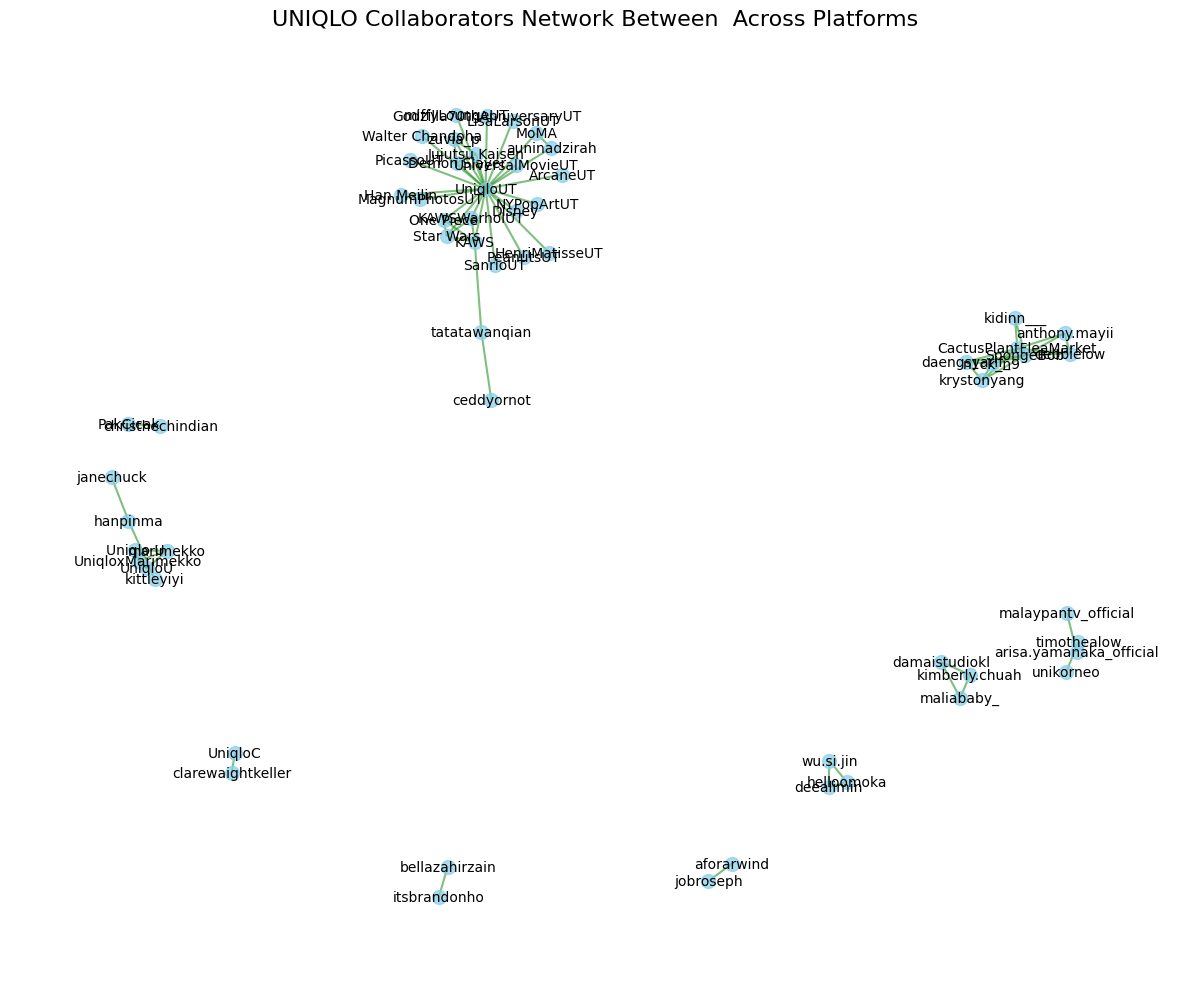

In [23]:
from math import sqrt
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

# Initialize a graph for influencer relationships
G = nx.Graph()

# Track influencer connections
influencer_connections = defaultdict(int)

# Define a repulsion factor.  Higher values increase repulsion.
repulsion_strength = 2  #Adjust this to control the spacing

# Process each post to find co-occurring influencers
for _, row in master_df[master_df['Brand'] == 'UNIQLO'].iterrows():
    influencers = list(row['influencers'])
    
    # Only process posts with multiple influencers
    if len(influencers) > 1:
        # Add all possible pairs of influencers
        for i in range(len(influencers)):
            for j in range(i+1, len(influencers)):
                influencer1 = influencers[i]
                influencer2 = influencers[j]
                influencer_pair = tuple(sorted([influencer1, influencer2]))
                influencer_connections[influencer_pair] += 1

# Add nodes and edges to the graph
for (influencer1, influencer2), weight in influencer_connections.items():
    if influencer1 not in G:
        G.add_node(influencer1, type='influencer')
    if influencer2 not in G:
        G.add_node(influencer2, type='influencer')
    G.add_edge(influencer1, influencer2, weight=weight)

# Create a DataFrame from the connections
relationships = []
for (influencer1, influencer2), weight in influencer_connections.items():
    relationships.append({
        'Influencer1': influencer1,
        'Influencer2': influencer2,
        'Connection_Strength': weight
    })

relationship_df = pd.DataFrame(relationships).sort_values('Connection_Strength', ascending=False)

# Increase k value to spread nodes apart
k_val = 1 / sqrt(len(G.nodes())) * 5# Square using exponentiation operator
iterations = 200

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=k_val, iterations = iterations, seed= 43)


# Get edge weights for width
#ege_weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5, edge_color='green')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("UNIQLO Collaborators Network Between  Across Platforms", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Analyze influencer relationships
relationship_df

# Show graph
G


## Brands and influencers

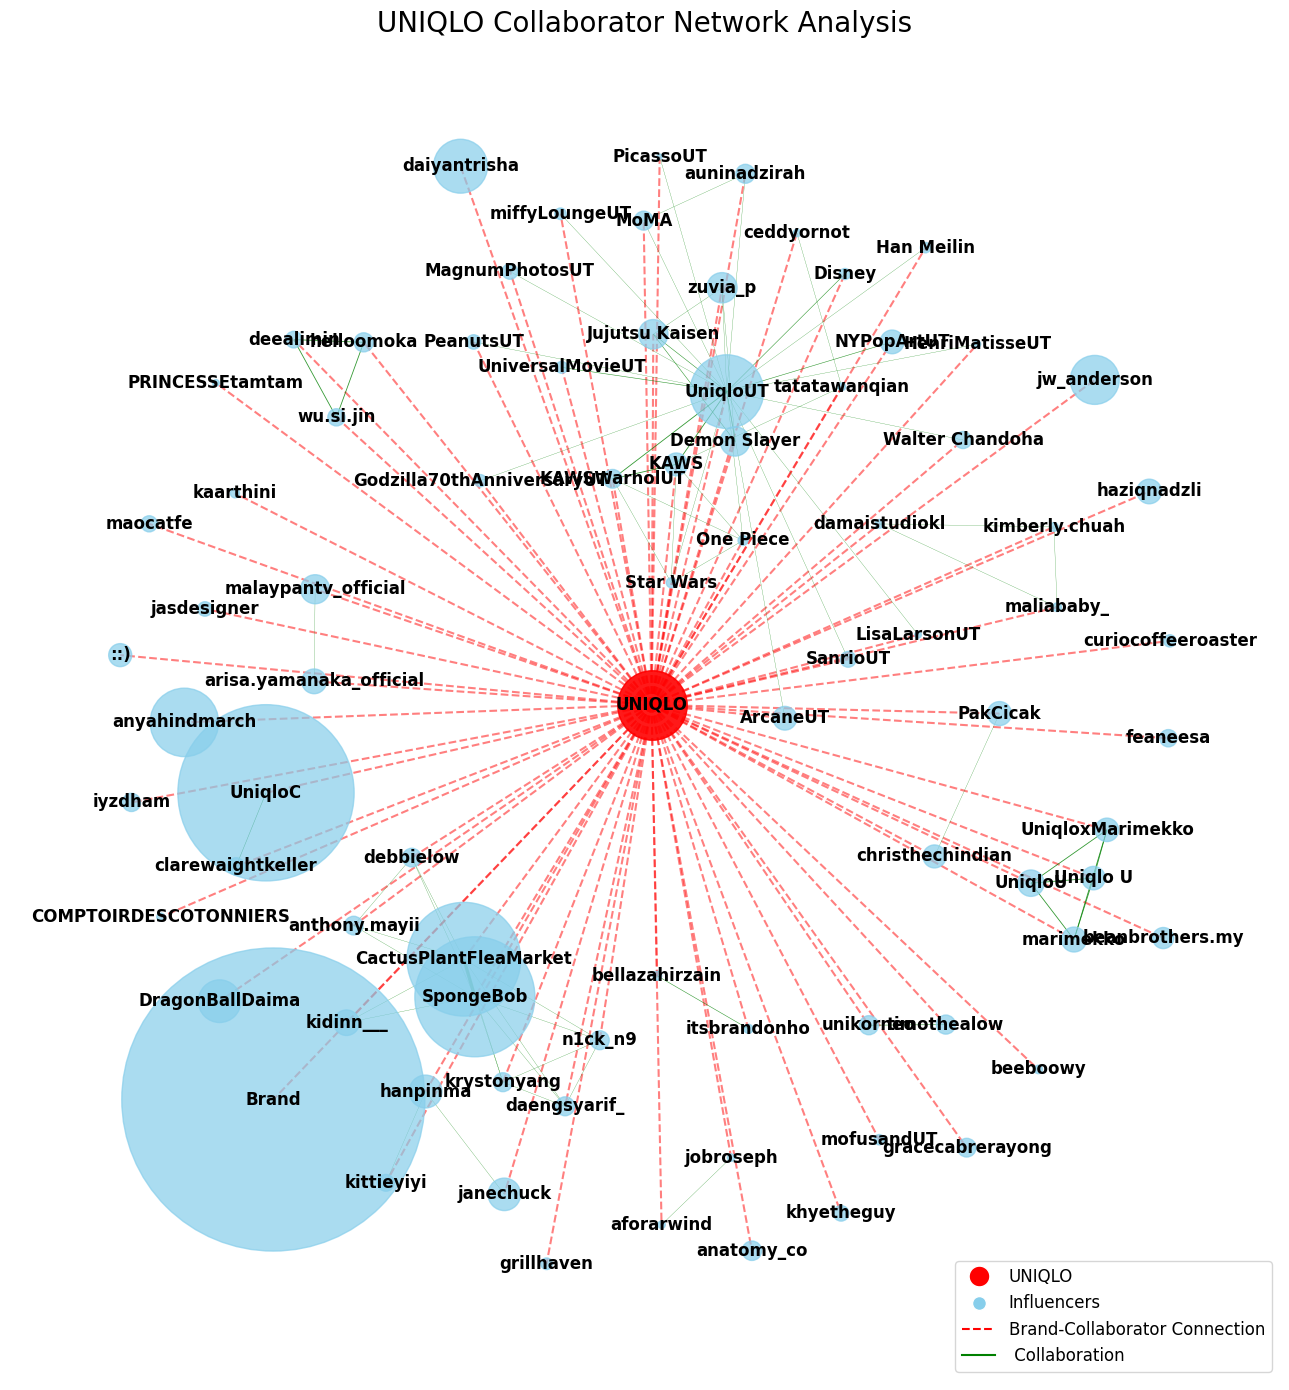

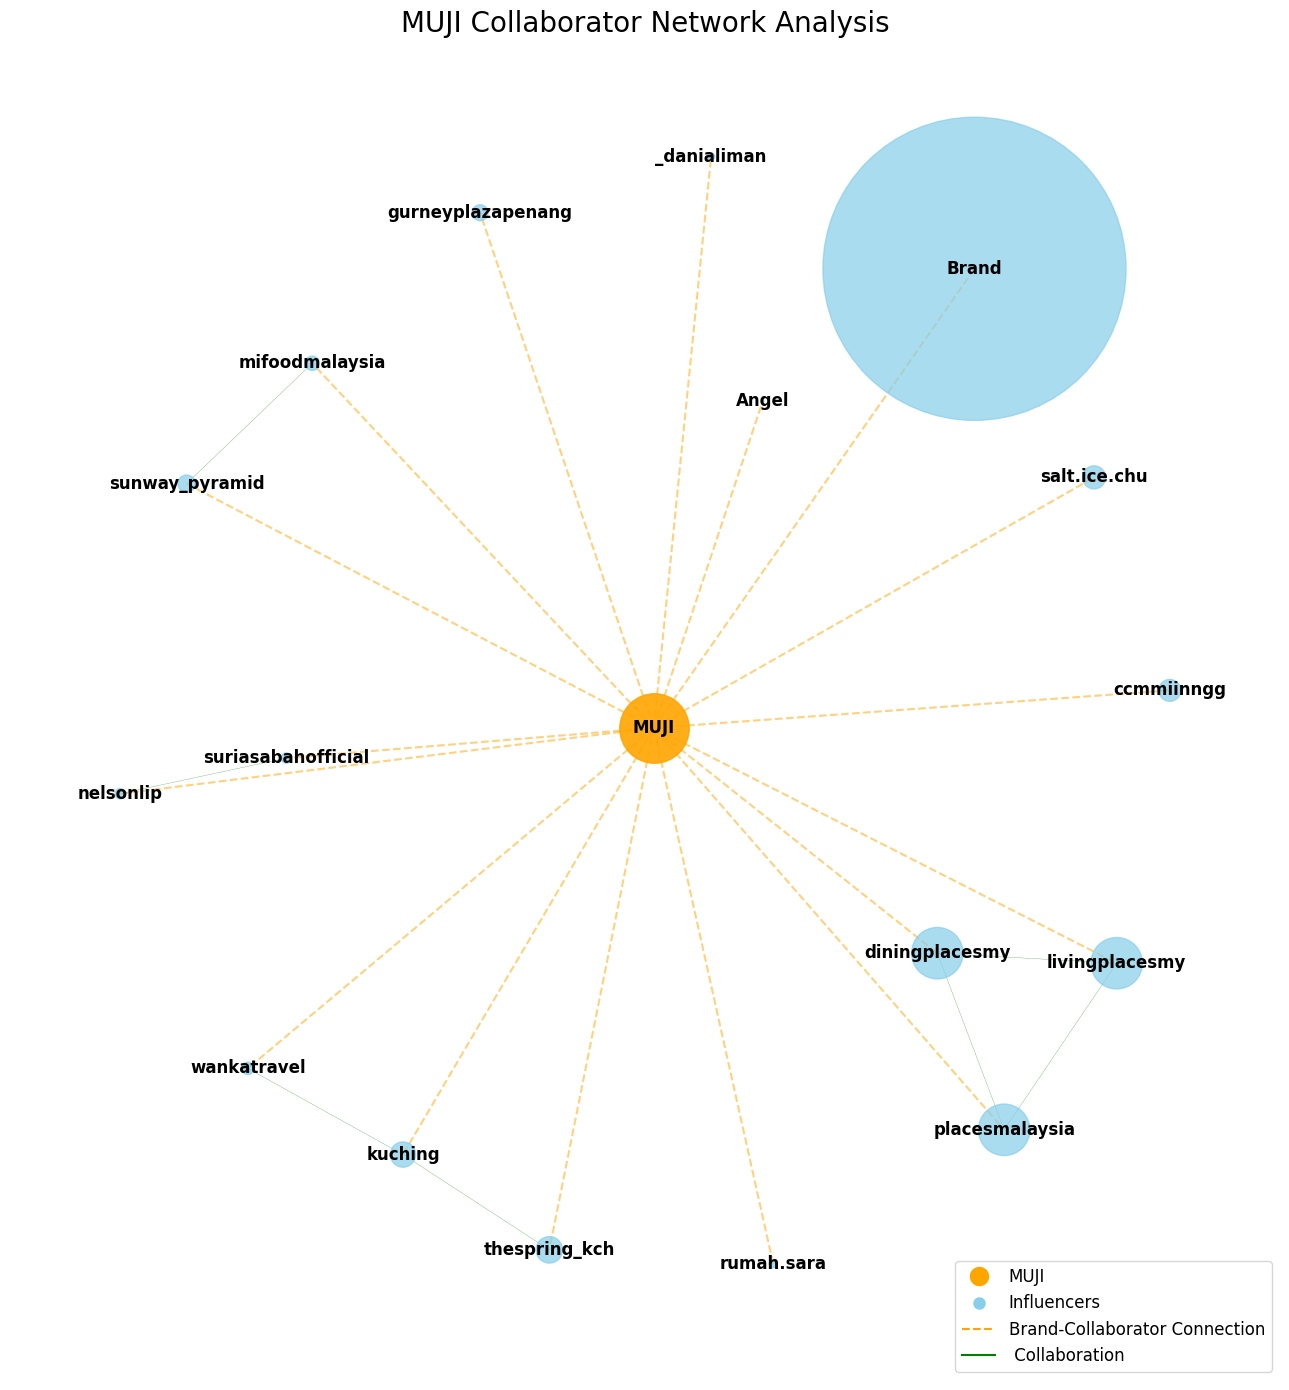

In [24]:
# Top 100 posts by engagement
high_engagement_df = master_df.sort_values(by='engagements', ascending=False)

network_graph = analyze_relationships(high_engagement_df)
network_graph

## Influencers Posts Counts

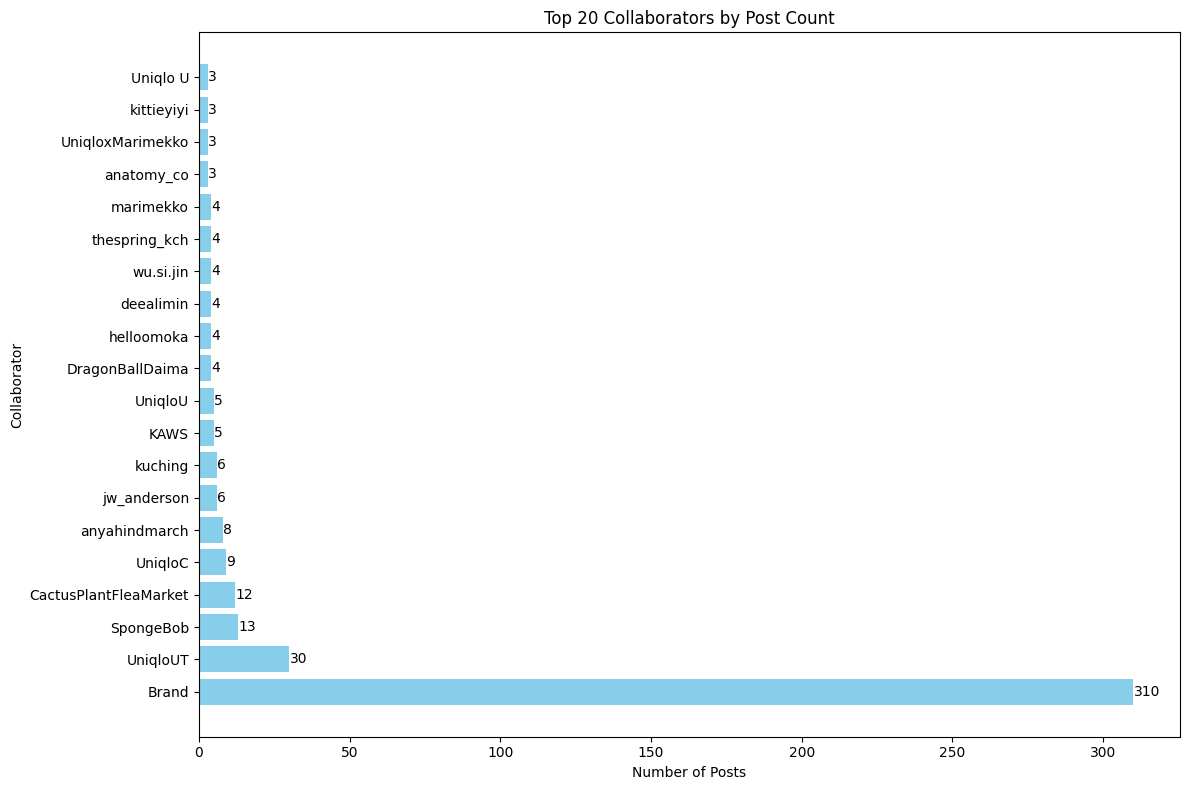

Total unique influencers: 97


,Influencer,Post_Count
0,Brand,310
1,UniqloUT,30
2,SpongeBob,13
3,CactusPlantFleaMarket,12
4,UniqloC,9
5,anyahindmarch,8
6,jw_anderson,6
7,kuching,6
8,KAWS,5
9,UniqloU,5


In [25]:
# Analyze influencers

def analyze_influencers(df):
    # Count influencer appearances
    all_influencers = []
    
    # Extract all influencers from the set column
    for influencer_set in df['influencers']:
        if len(influencer_set) > 0:  # Only process non-empty sets
            for influencer in influencer_set:
                # Skip NaN values or convert to string
                if influencer is not None and not (isinstance(influencer, float) and np.isnan(influencer)):
                    all_influencers.append(str(influencer))
    
    # Count occurrences
    influencer_counts = Counter(all_influencers) # Skip the first element (Brand)
    
    # Convert to DataFrame for easier visualization
    influencer_df = pd.DataFrame({
        'Influencer': list(influencer_counts.keys()),
        'Post_Count': list(influencer_counts.values())
    }).sort_values('Post_Count', ascending=False)
    
    # Plot top 20 influencers
    plt.figure(figsize=(12, 8))
    top_influencers = influencer_df.head(20)# Skip the first element (Brand)
    
    bars = plt.barh(top_influencers['Influencer'], top_influencers['Post_Count'], color='skyblue')
    plt.xlabel('Number of Posts')
    plt.ylabel('Collaborator')
    plt.title('Top 20 Collaborators by Post Count')
    
    # Add count labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
                 ha='left', va='center')
    
    plt.tight_layout()
    plt.show()
    
    return influencer_df

# Run the analysis
influencer_counts = analyze_influencers(master_df)
print(f"Total unique influencers: {len(influencer_counts)}")
influencer_counts.reset_index(drop=True).head(20)

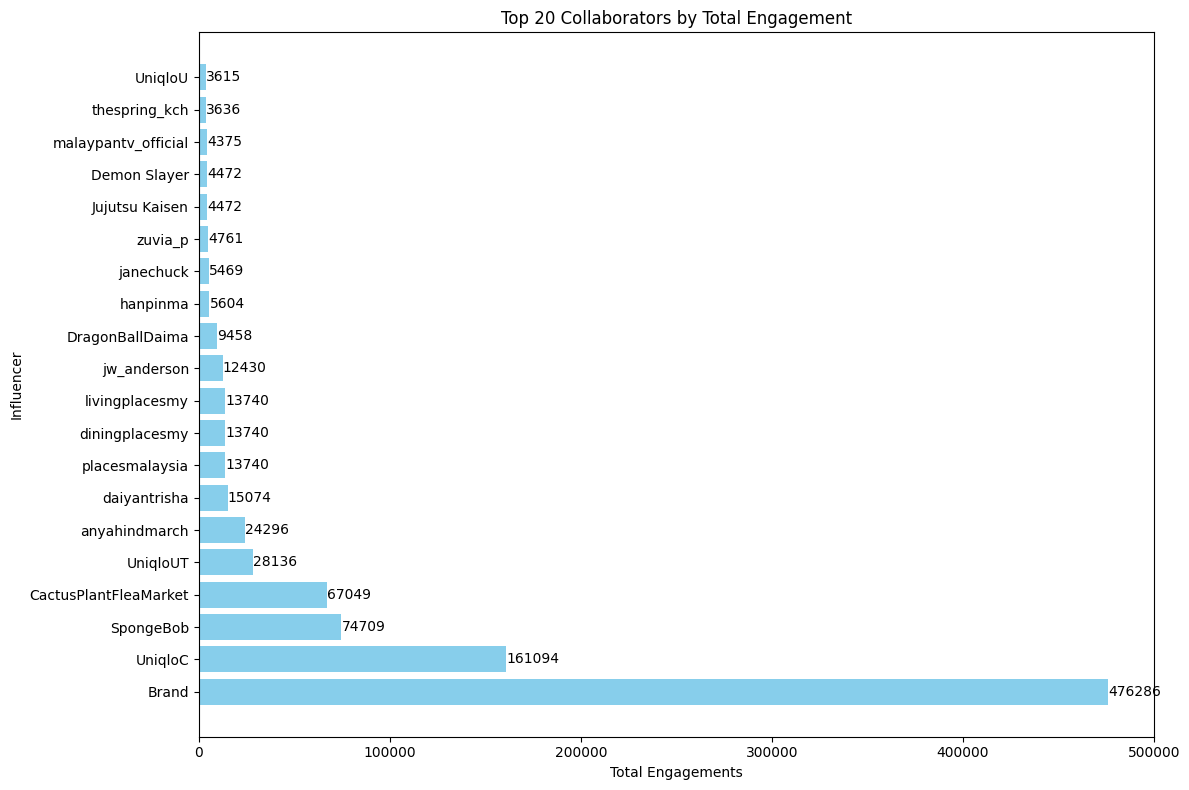

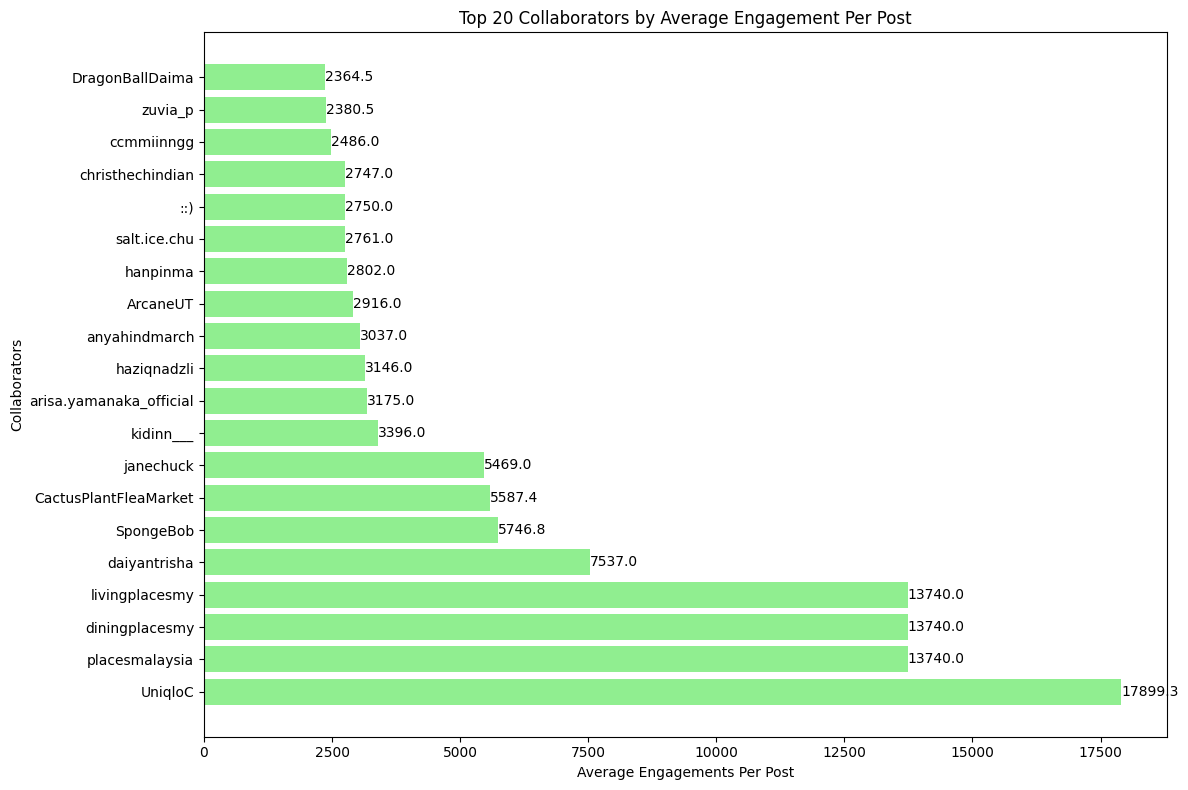

Total unique influencers: 97


,Influencer,Post_Count,Total_Engagements,Avg_Engagement_Per_Post
0,Brand,310,476286.0,1536.406452
1,UniqloC,9,161094.0,17899.333333
2,SpongeBob,13,74709.0,5746.846154
3,CactusPlantFleaMarket,12,67049.0,5587.416667
4,UniqloUT,30,28136.0,937.866667
5,anyahindmarch,8,24296.0,3037.000000
6,daiyantrisha,2,15074.0,7537.000000
7,placesmalaysia,1,13740.0,13740.000000
8,diningplacesmy,1,13740.0,13740.000000
9,livingplacesmy,1,13740.0,13740.000000


In [26]:
influencer_data = defaultdict(lambda: {'post_count': 0, 'total_engagements': 0})

# Extract all influencers and their engagements from the set column
for _, row in master_df.iterrows():
    influencer_set = row['influencers']
    engagements = row['engagements']
    
    if len(influencer_set) > 0:  # Only process non-empty sets
        for influencer in influencer_set:
            # Skip NaN values or convert to string
            if influencer is not None and not (isinstance(influencer, float) and np.isnan(influencer)):
                influencer_data[str(influencer)]['post_count'] += 1
                influencer_data[str(influencer)]['total_engagements'] += engagements

# Convert to DataFrame for easier visualization
influencer_df = pd.DataFrame([
    {
        'Influencer': influencer,
        'Post_Count': data['post_count'],
        'Total_Engagements': data['total_engagements'],
        'Avg_Engagement_Per_Post': data['total_engagements'] / data['post_count']
    }
    for influencer, data in influencer_data.items()
]).sort_values('Total_Engagements', ascending=False)

# Plot top 20 influencers by engagement
plt.figure(figsize=(12, 8))
top_influencers = influencer_df.head(20)

bars = plt.barh(top_influencers['Influencer'], top_influencers['Total_Engagements'], color='skyblue')
plt.xlabel('Total Engagements')
plt.ylabel('Influencer')
plt.title('Top 20 Collaborators by Total Engagement')

# Add count labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
             ha='left', va='center')

plt.tight_layout()
plt.show()

# Create a second plot for average engagement per post
plt.figure(figsize=(12, 8))
top_avg_influencers = influencer_df.sort_values('Avg_Engagement_Per_Post', ascending=False).head(20)

bars = plt.barh(top_avg_influencers['Influencer'], top_avg_influencers['Avg_Engagement_Per_Post'], color='lightgreen')
plt.xlabel('Average Engagements Per Post')
plt.ylabel('Collaborators')
plt.title('Top 20 Collaborators by Average Engagement Per Post')

# Add count labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.1f}', 
             ha='left', va='center')

plt.tight_layout()
plt.show()

print(f"Total unique influencers: {len(influencer_df)}")
influencer_df[['Influencer', 'Post_Count', 'Total_Engagements', 'Avg_Engagement_Per_Post']].reset_index(drop=True).head(20)

In [27]:
for i in influencer_df['Influencer']:
    print(i)

Brand
UniqloC
SpongeBob
CactusPlantFleaMarket
UniqloUT
anyahindmarch
daiyantrisha
placesmalaysia
diningplacesmy
livingplacesmy
jw_anderson
DragonBallDaima
hanpinma
janechuck
zuvia_p
Jujutsu Kaisen
Demon Slayer
malaypantv_official
thespring_kch
UniqloU
kidinn___
kuching
marimekko
arisa.yamanaka_official
haziqnadzli
PakCicak
ArcaneUT
NYPopArtUT
Uniqlo U
UniqloxMarimekko
salt.ice.chu
::)
christhechindian
KAWS
ccmmiinngg
beanbrothers.my
anatomy_co
helloomoka
timothealow
unikorneo
auninadzirah
MoMA
n1ck_n9
krystonyang
daengsyarif_
gracecabrerayong
KAWSWarholUT
debbielow
anthony.mayii
iyzdham
clarewaightkeller
sunway_pyramid
feaneesa
wu.si.jin
Walter Chandoha
kittieyiyi
deealimin
maocatfe
gurneyplazapenang
SanrioUT
MagnumPhotosUT
khyetheguy
jasdesigner
PeanutsUT
mifoodmalaysia
wankatravel
curiocoffeeroaster
Godzilla70thAnniversaryUT
UniversalMovieUT
grillhaven
miffyLoungeUT
Disney
Han Meilin
mofusandUT
suriasabahofficial
nelsonlip
Star Wars
One Piece
kaarthini
itsbrandonho
bellazahirzain
kim

C:\Users\anhpd\AppData\Local\Temp\ipykernel_17468\1389645812.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Degree_Centrality', y='Node', data=top_degree, ax=axes[0, 0], palette='viridis')
C:\Users\anhpd\AppData\Local\Temp\ipykernel_17468\1389645812.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Betweenness_Centrality', y='Node', data=top_betweenness, ax=axes[0, 1], palette='viridis')
C:\Users\anhpd\AppData\Local\Temp\ipykernel_17468\1389645812.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Eigenvector_Centrality

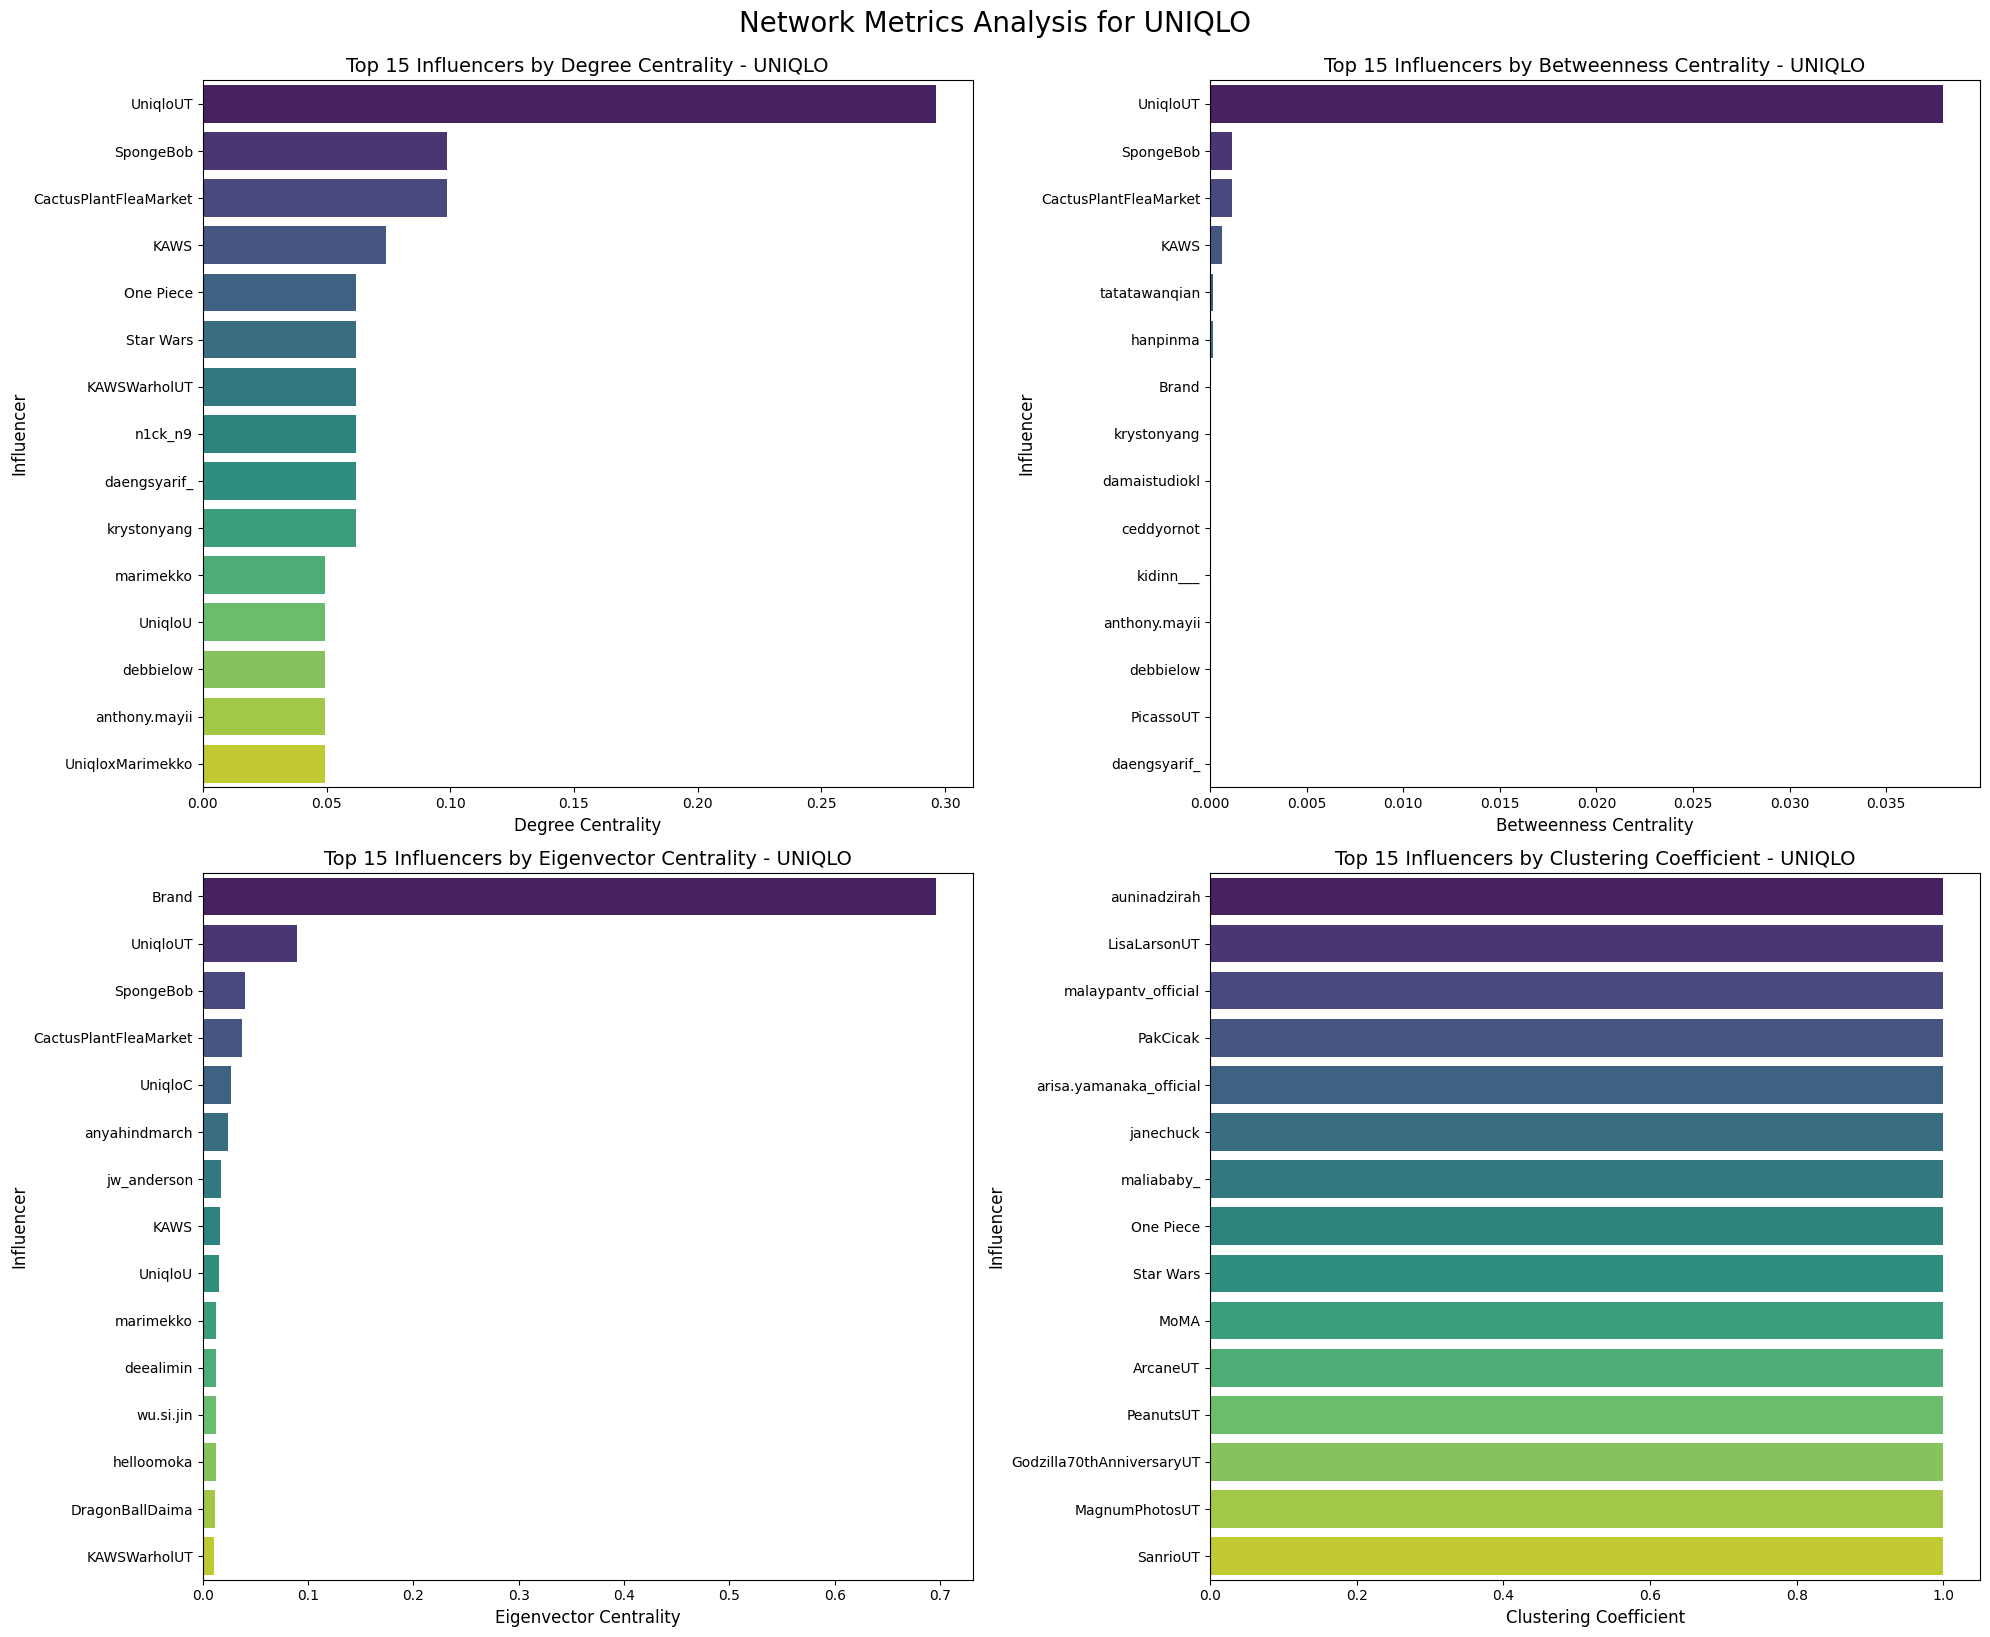

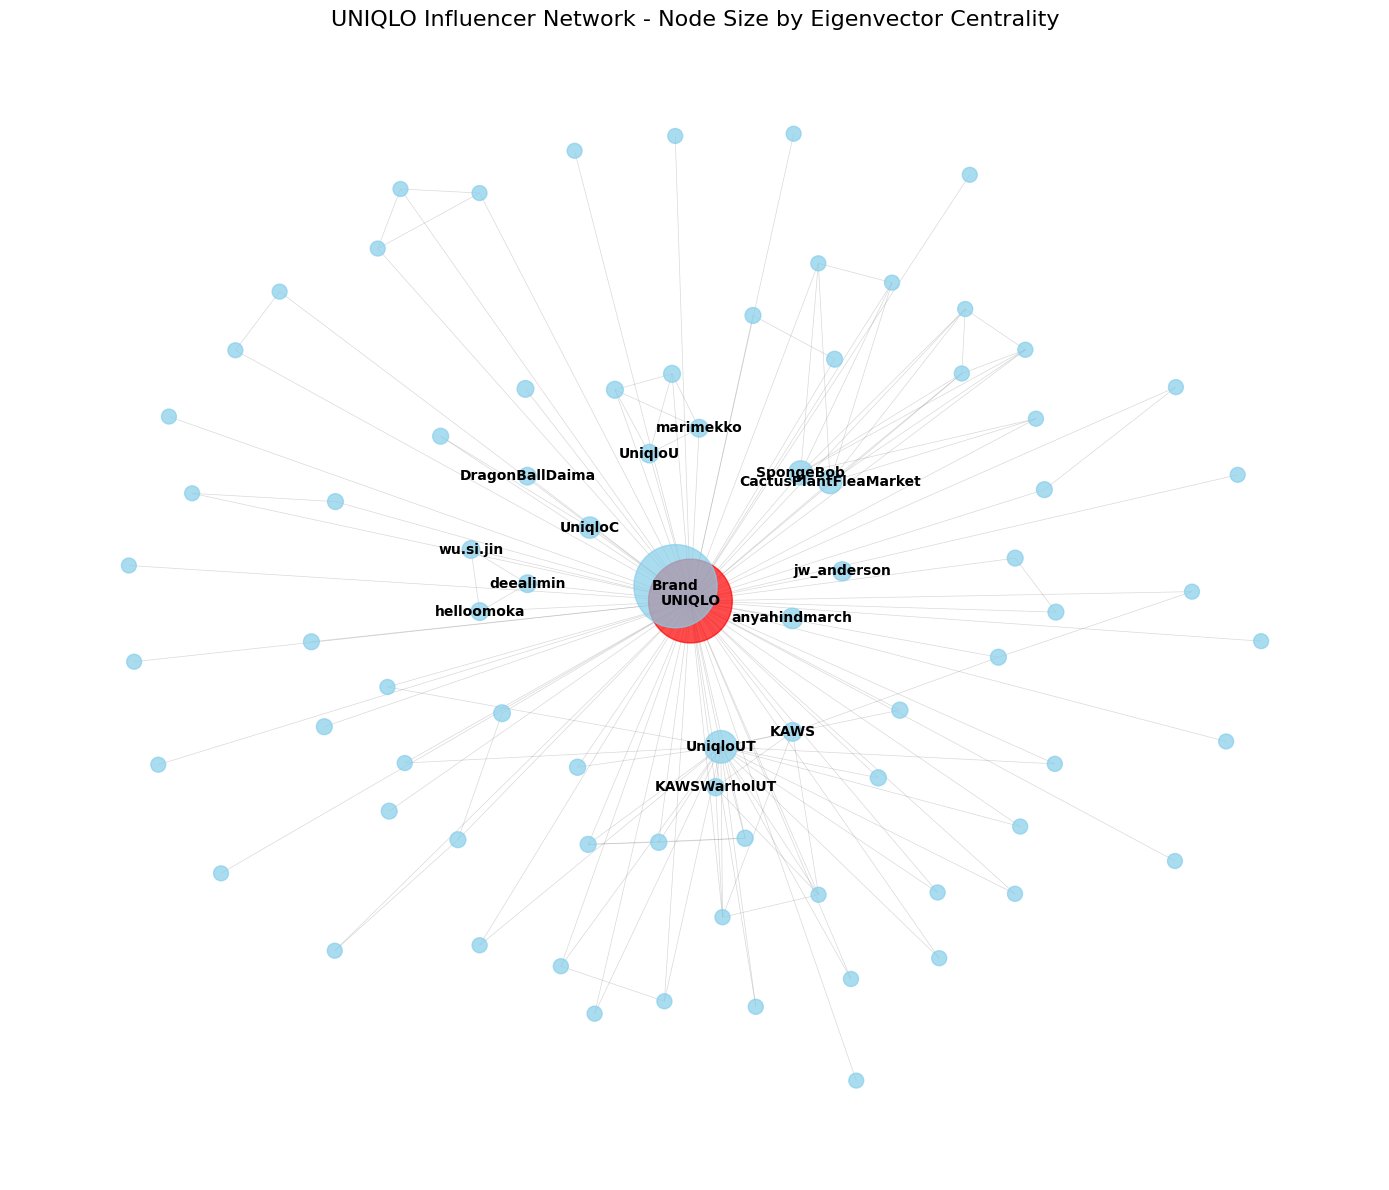

UNIQLO Network Size: 82 nodes, 153 connections

Network-Level Metrics:
UNIQLO Network Density: 0.0461
UNIQLO Network Transitivity: 0.0861

Top 10 Influencers by Eigenvector Centrality:

UNIQLO:
                     Node  Eigenvector_Centrality
7                   Brand                0.696194
9                UniqloUT                0.089726
47              SpongeBob                0.040490
46  CactusPlantFleaMarket                0.037670
41                UniqloC                0.026714
1           anyahindmarch                0.023700
60            jw_anderson                0.017775
13                   KAWS                0.016124
4                 UniqloU                0.015202
6               marimekko                0.012276


In [28]:
# Calculate network metrics for influencer networks
def calculate_network_metrics(G):
    """
    Calculate key network metrics for a given graph
    
    Parameters:
    G: NetworkX graph object
    
    Returns:
    DataFrame with network metrics
    """
    # Calculate network metrics
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, k=min(500, len(G)-1), normalized=True)
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G, weight='weight')
    clustering_coefficient = nx.clustering(G)
    
    # Create a DataFrame for the metrics
    metrics_df = pd.DataFrame({
        'Node': list(G.nodes()),
        'Degree': [G.degree(node) for node in G.nodes()],
        'Degree_Centrality': [degree_centrality[node] for node in G.nodes()],
        'Betweenness_Centrality': [betweenness_centrality[node] for node in G.nodes()],
        'Eigenvector_Centrality': [eigenvector_centrality[node] for node in G.nodes()],
        'Clustering_Coefficient': [clustering_coefficient[node] for node in G.nodes()]
    })
    
    # Add node type
    metrics_df['Type'] = metrics_df['Node'].apply(lambda x: 'Brand' if x == 'UNIQLO' or x == 'MUJI' else 'Influencer')
    
    # Sort by eigenvector centrality
    metrics_df = metrics_df.sort_values('Eigenvector_Centrality', ascending=False)
    
    return metrics_df

def analyze_network_metrics(df, brand_name, plot=True):
    """
    Calculate and visualize key network metrics for the influencer network of a specific brand
    
    Parameters:
    df: DataFrame with influencer data
    brand_name: Name of the brand to analyze
    plot: Whether to produce visualizations
    
    Returns:
    DataFrame with network metrics and the NetworkX graph
    """
    # Filter for the specific brand
    brand_df = df[df['Brand'] == brand_name]
    
    # Initialize a graph
    G = nx.Graph()
    
    # Track influencer connections
    influencer_connections = defaultdict(int)
    
    # Add brand node
    G.add_node(brand_name, type='brand')
    
    # Process each post to find influencers
    for _, row in brand_df.iterrows():
        influencers = list(row['influencers'])
        
        # Add influencer nodes and connections to brand
        for influencer in influencers:
            if influencer not in G:
                G.add_node(influencer, type='influencer')
            
            # Add connection to brand if not already present
            if not G.has_edge(brand_name, influencer):
                G.add_edge(brand_name, influencer, weight=1)
            else:
                G[brand_name][influencer]['weight'] += 1
        
        # Add connections between influencers
        if len(influencers) > 1:
            for i in range(len(influencers)):
                for j in range(i+1, len(influencers)):
                    influencer_pair = tuple(sorted([influencers[i], influencers[j]]))
                    influencer_connections[influencer_pair] += 1
    
    # Add influencer-to-influencer connections
    for (influencer1, influencer2), weight in influencer_connections.items():
        G.add_edge(influencer1, influencer2, weight=weight)
    
    # Calculate metrics using the separated function
    metrics_df = calculate_network_metrics(G)
    
    if plot:
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(20, 16))
        
        # 1. Degree Centrality
        top_degree = metrics_df[metrics_df['Type'] == 'Influencer'].sort_values('Degree_Centrality', ascending=False).head(15)
        sns.barplot(x='Degree_Centrality', y='Node', data=top_degree, ax=axes[0, 0], palette='viridis')
        axes[0, 0].set_title(f'Top 15 Influencers by Degree Centrality - {brand_name}', fontsize=14)
        axes[0, 0].set_xlabel('Degree Centrality', fontsize=12)
        axes[0, 0].set_ylabel('Influencer', fontsize=12)
        
        # 2. Betweenness Centrality
        top_betweenness = metrics_df[metrics_df['Type'] == 'Influencer'].sort_values('Betweenness_Centrality', ascending=False).head(15)
        sns.barplot(x='Betweenness_Centrality', y='Node', data=top_betweenness, ax=axes[0, 1], palette='viridis')
        axes[0, 1].set_title(f'Top 15 Influencers by Betweenness Centrality - {brand_name}', fontsize=14)
        axes[0, 1].set_xlabel('Betweenness Centrality', fontsize=12)
        axes[0, 1].set_ylabel('Influencer', fontsize=12)
        
        # 3. Eigenvector Centrality
        top_eigenvector = metrics_df[metrics_df['Type'] == 'Influencer'].sort_values('Eigenvector_Centrality', ascending=False).head(15)
        sns.barplot(x='Eigenvector_Centrality', y='Node', data=top_eigenvector, ax=axes[1, 0], palette='viridis')
        axes[1, 0].set_title(f'Top 15 Influencers by Eigenvector Centrality - {brand_name}', fontsize=14)
        axes[1, 0].set_xlabel('Eigenvector Centrality', fontsize=12)
        axes[1, 0].set_ylabel('Influencer', fontsize=12)
        
        # 4. Clustering Coefficient
        top_clustering = metrics_df[metrics_df['Type'] == 'Influencer'].sort_values('Clustering_Coefficient', ascending=False).head(15)
        sns.barplot(x='Clustering_Coefficient', y='Node', data=top_clustering, ax=axes[1, 1], palette='viridis')
        axes[1, 1].set_title(f'Top 15 Influencers by Clustering Coefficient - {brand_name}', fontsize=14)
        axes[1, 1].set_xlabel('Clustering Coefficient', fontsize=12)
        axes[1, 1].set_ylabel('Influencer', fontsize=12)
        
        plt.tight_layout()
        plt.suptitle(f'Network Metrics Analysis for {brand_name}', fontsize=20, y=1.02)
        plt.show()
        
        # Network visualization with node sizes based on eigenvector centrality
        plt.figure(figsize=(14, 12))
        
        # Get eigenvector centrality values from the metrics dataframe
        eigenvector_centrality = metrics_df.set_index('Node')['Eigenvector_Centrality'].to_dict()
        
        # Define node sizes based on centrality
        node_sizes = [eigenvector_centrality[node] * 5000 + 100 for node in G.nodes()]
        node_colors = ['red' if node == brand_name else 'skyblue' for node in G.nodes()]
        
        # Create layout
        pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)
        
        # Draw network
        nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
        nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3, edge_color='gray')
        
        # Add labels only for nodes with high centrality
        top_nodes = [node for _, node in sorted([(eigenvector_centrality[node], node) for node in G.nodes()], reverse=True)[:16]]
        labels = {node: node for node in top_nodes}
        nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')
        
        plt.title(f'{brand_name} Influencer Network - Node Size by Eigenvector Centrality', fontsize=16)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    return metrics_df, G

# Run analysis for each brand
metrics_uniqlo, uniqlo_graph = analyze_network_metrics(master_df, 'UNIQLO')

# Compare the networks
print(f"UNIQLO Network Size: {len(uniqlo_graph.nodes())} nodes, {len(uniqlo_graph.edges())} connections")


# Calculate network-level metrics
print("\nNetwork-Level Metrics:")
print(f"UNIQLO Network Density: {nx.density(uniqlo_graph):.4f}")

print(f"UNIQLO Network Transitivity: {nx.transitivity(uniqlo_graph):.4f}")


# Show top 10 influencers by eigenvector centrality for each brand
print("\nTop 10 Influencers by Eigenvector Centrality:")
print("\nUNIQLO:")
print(metrics_uniqlo[metrics_uniqlo['Type'] == 'Influencer'].head(10)[['Node', 'Eigenvector_Centrality']])

In [29]:
metrics_uniqlo

,Node,Degree,Degree_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Clustering_Coefficient,Type
0,UNIQLO,87,1.000000,0.938807,0.706983,0.023256,Brand
9,Brand,1,0.011494,0.000000,0.696453,0.000000,Influencer
11,UniqloUT,24,0.275862,0.032851,0.089376,0.119565,Influencer
49,SpongeBob,8,0.091954,0.000991,0.040326,0.607143,Influencer
48,CactusPlantFleaMarket,8,0.091954,0.000991,0.037515,0.607143,Influencer
...,...,...,...,...,...,...,...
54,::),1,0.011494,0.000000,0.002951,0.000000,Influencer
79,UniqloU,1,0.011494,0.000000,0.002951,0.000000,Influencer
53,curiocoffeeroaster,1,0.011494,0.000000,0.002951,0.000000,Influencer
7,beeboowy,1,0.011494,0.000000,0.002951,0.000000,Influencer


In [30]:
with pd.ExcelWriter(r"C:\Users\anhpd\OneDrive\Desktop\Web Analytics\web_analytics.xlsx", engine='xlsxwriter') as writer:
    top_keywords_df.to_excel(writer, sheet_name='Top Keywords', index=False)
    
    master_df.to_excel(writer, sheet_name='Posts', index=False)
    
    dfff.to_excel(writer, sheet_name='DFFF', index=False)
    
    sentiment_distribution_uniqlo.to_excel(writer, sheet_name='Sentiment Uniqlo', index=False)
    
    sentiment_distribution_muji.to_excel(writer, sheet_name='Sentiment Muji', index=False)
    
    relationship_df.to_excel(writer, sheet_name='Influencer Relationship', index=False)
    
    high_engagement_df.to_excel(writer, sheet_name='High Engagement', index=False)
    
    influencer_df.to_excel(writer, sheet_name='Influencer', index=False)
    
    metrics_uniqlo.to_excel(writer, sheet_name='Metrics Uniqlo', index=False)
